In [1]:
import numpy as np 
import cv2 #opencv
from matplotlib import pyplot as plt 
import os #경로 지정용 라이브러리
import matplotlib.image as mpimg
import pandas as pd
from sklearn.cluster import KMeans #K-means 클러스터링
import scipy.misc #scipy 넘파이의 확장 고급 연산용 복소수 다룰려공
from PIL import Image #이미지

In [2]:
def image_color_cluster(image_path, k = 3): 
    direc1 = os.listdir(image_path) #지정된 경로의 파일 리스트를 읽어온다.
    for i in direc1:
        image1 = cv2.imread(image_path + "/" + i) #opencv로 이미지 읽어오기
        image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) #opencv는 기본적으로 색상을 BGR로 읽어옴 그것을 RGB로 변환
        image = image.reshape((image.shape[0]*image.shape[1], 3)) #이미지 배열 차원 조정, 컬러 이미지라 3채널
        ggomsi = [] #이미지를 담을 빈 리스트 추가
        for arr in image: 
            if(arr.sum() != 0): #arr의 합이 0이 아니라면(검은색이 아니라면)
                ggomsi.append(arr) #꼼시 리스트에 추가
        clt = KMeans(n_clusters = k) #3개의 군집으로 나눈다.
        clt.fit(ggomsi) #저장된 이미지들을 학습시킴
        
        hist = centroid_histogram(clt) #학습된 데이터의 히스토그램 생성
        bar = plot_colors(hist, clt.cluster_centers_) #히스토그램의 색상은 학습된 이미지의 가장 많이 포함된 색상 3개
        
        plt.figure() 
        plt.axis("off") #축 표시X
        plt.imshow(bar) #이미지 보여주기
        plt.savefig(f"color_cluster_sample/{i}", bbox_inches='tight', pad_inches=0) #히스토그램 저장, 박스 간격 타이트하게 ,간격 0 
    return bar #생성한 히스토그램 리턴

In [3]:
def centroid_histogram(clt): #히스토그램을 생성
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1) #모든 픽셀을 저장 +1 이 있어야 함 -1 이니까 0~clt.labels까지 범위를 numlabel로 지정
    (hist, _) = np.histogram(clt.labels_, bins=numLabels) #히스토그램 생성
    
    hist = hist.astype("float") #hist의 타입을 float로 변경
    hist /= hist.sum() #hist 
    
    return hist #hist 리턴

바 크기 정하기

In [4]:
def plot_colors(hist, centroids):
    bar = np.zeros((50,300,3), dtype="uint8") #히스토그램 크기 지정
    startX = 0 #X축 시작 지점은 0부터
    
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300) #X축 끝나는 지점 지정
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),# 바 0에서 시작 몇,50으로 직사각형 찍어줌
                     color.astype("uint8").tolist(), -1) # 직사각형 
        startX = endX 
        
    return bar

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


완료


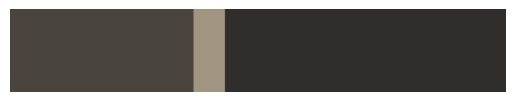

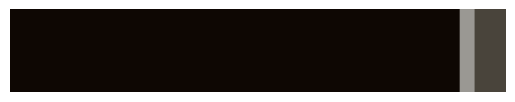

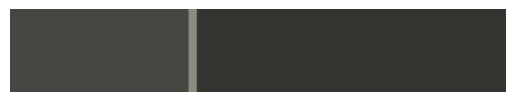

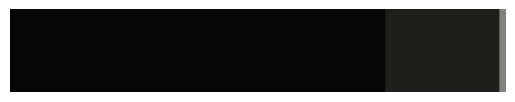

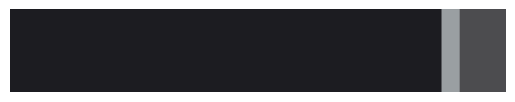

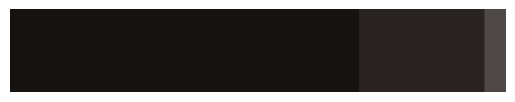

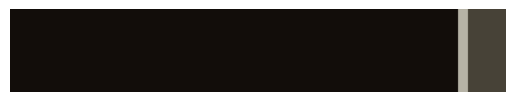

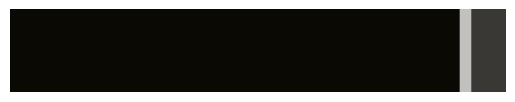

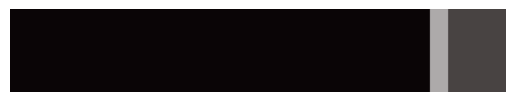

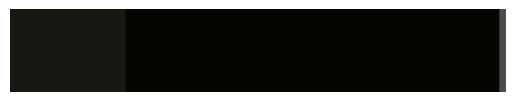

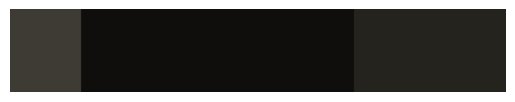

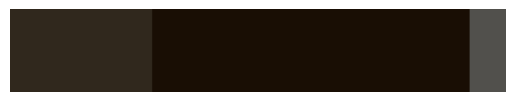

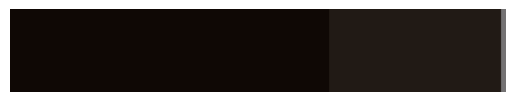

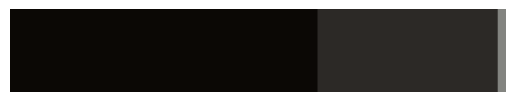

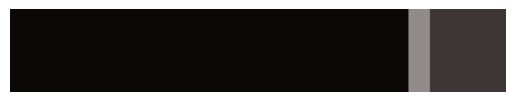

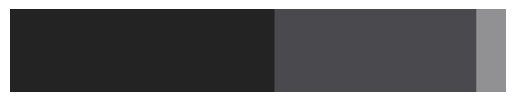

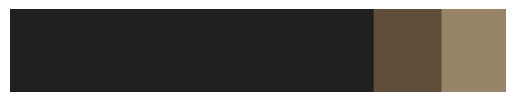

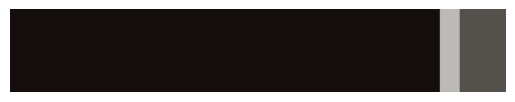

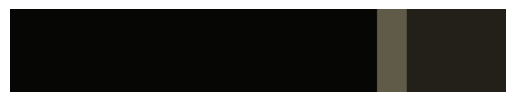

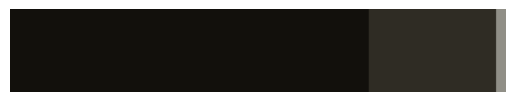

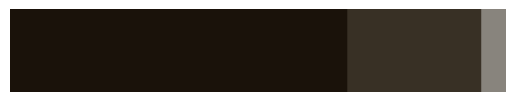

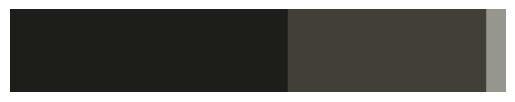

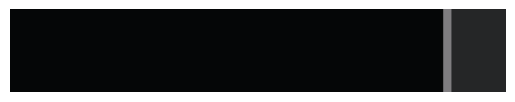

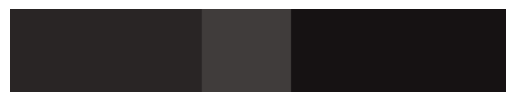

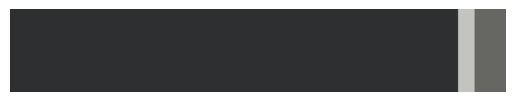

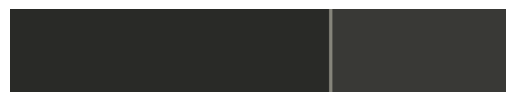

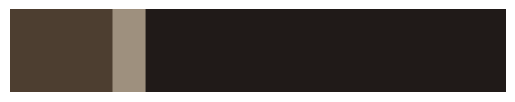

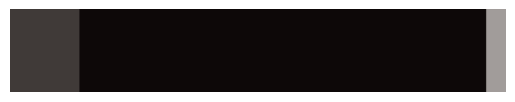

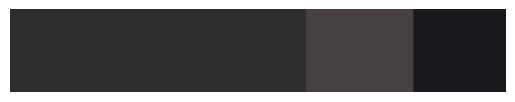

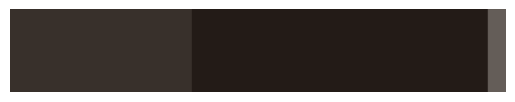

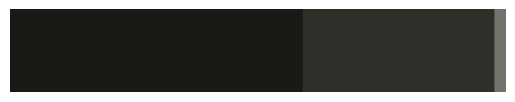

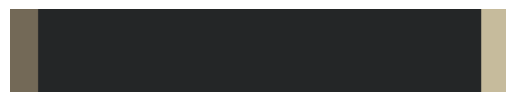

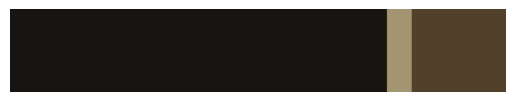

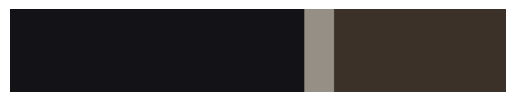

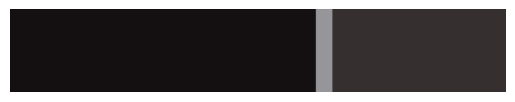

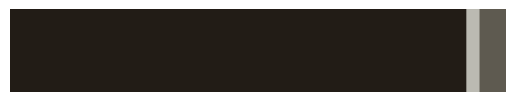

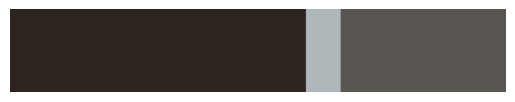

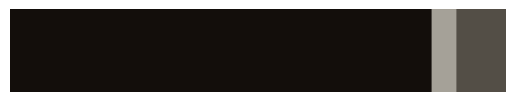

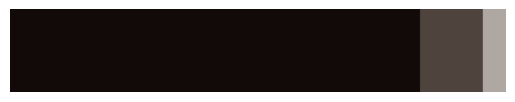

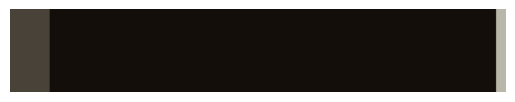

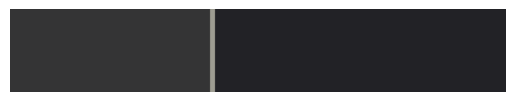

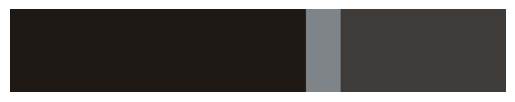

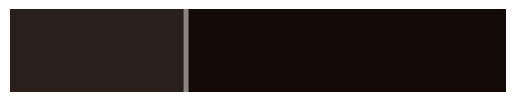

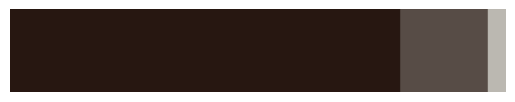

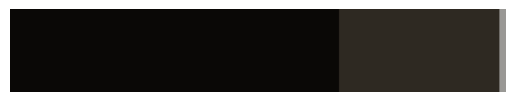

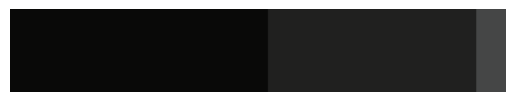

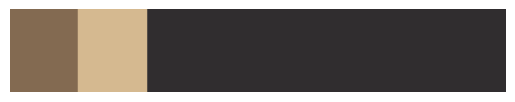

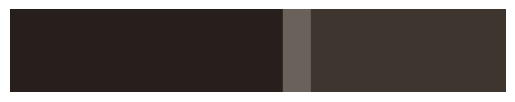

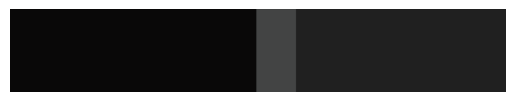

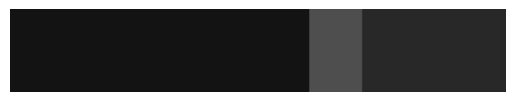

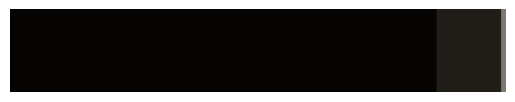

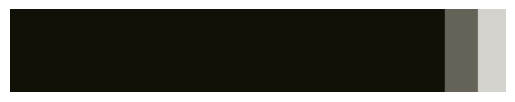

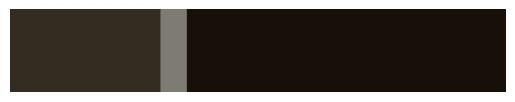

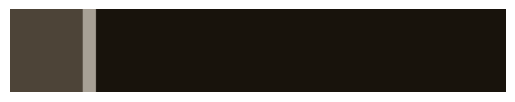

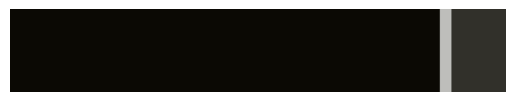

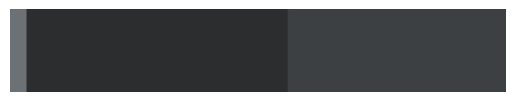

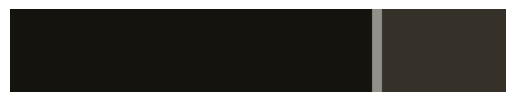

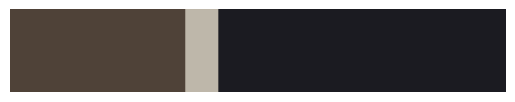

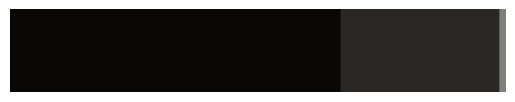

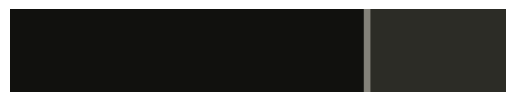

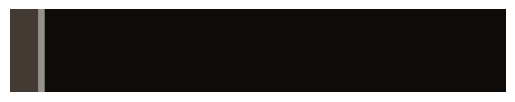

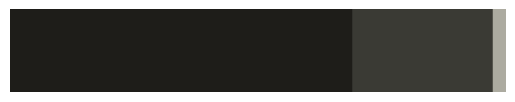

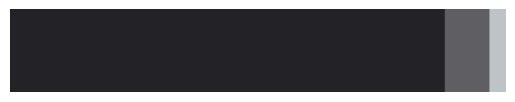

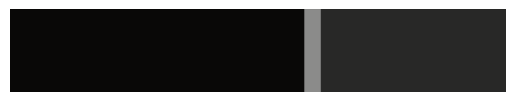

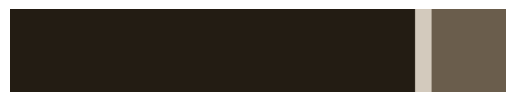

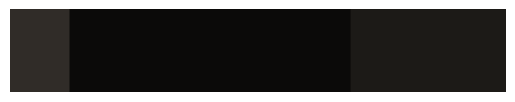

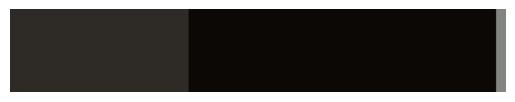

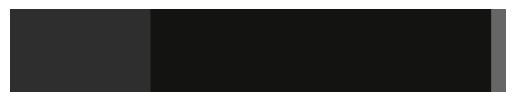

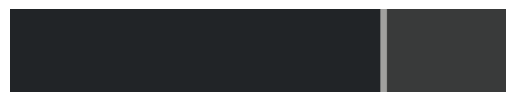

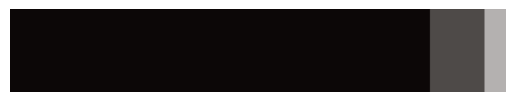

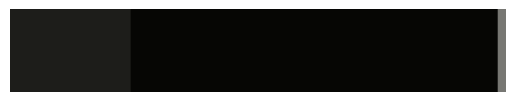

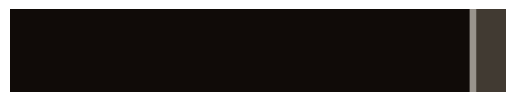

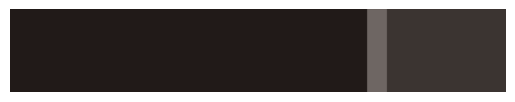

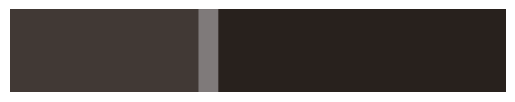

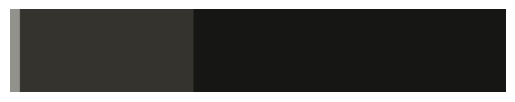

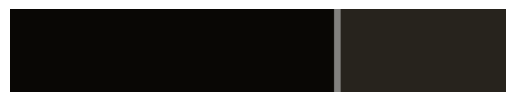

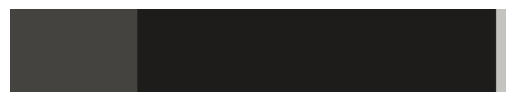

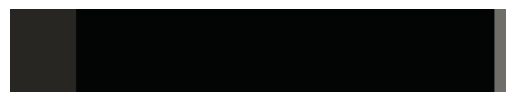

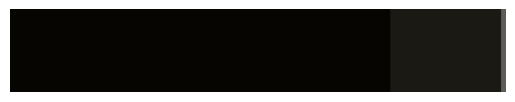

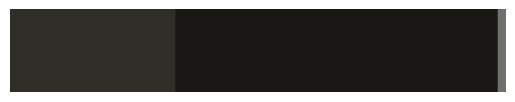

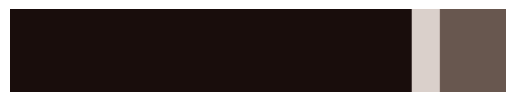

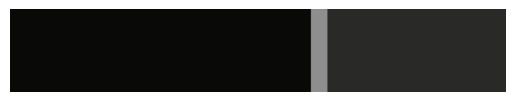

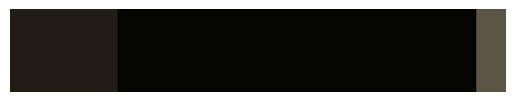

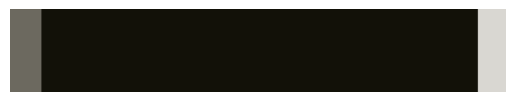

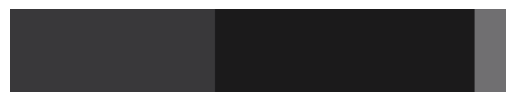

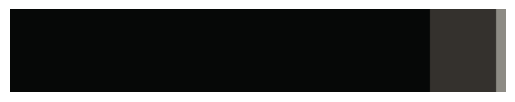

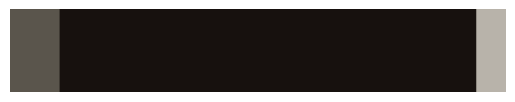

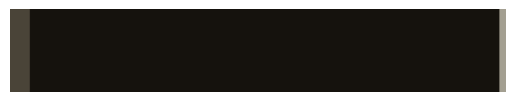

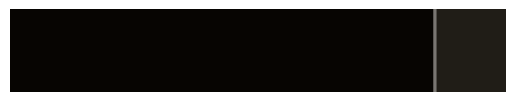

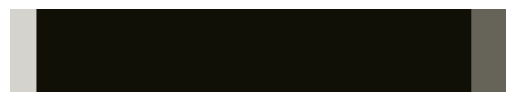

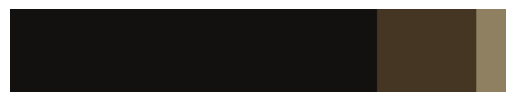

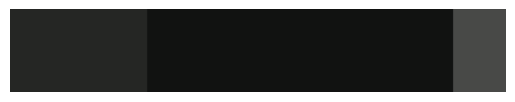

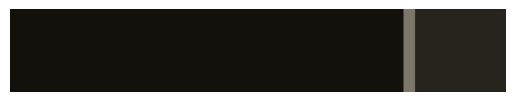

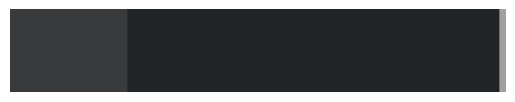

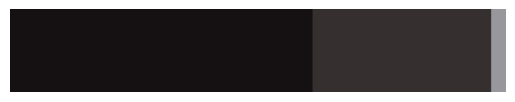

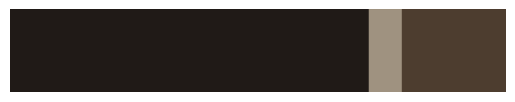

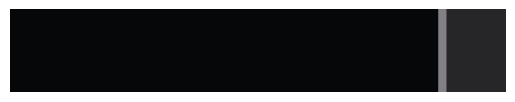

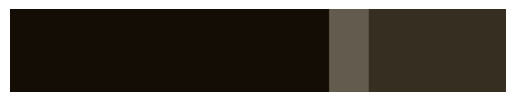

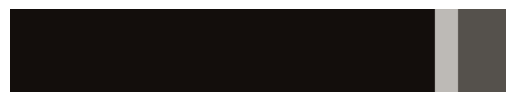

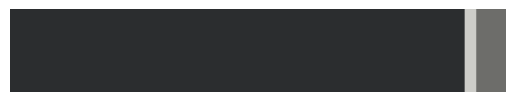

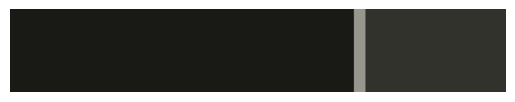

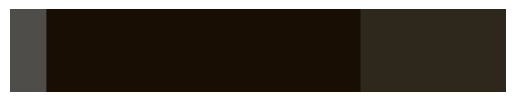

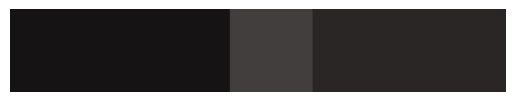

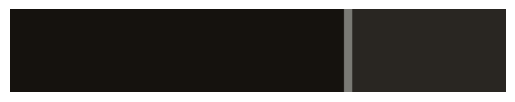

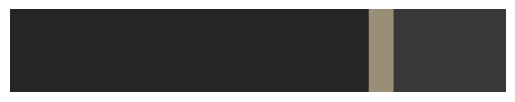

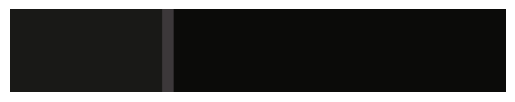

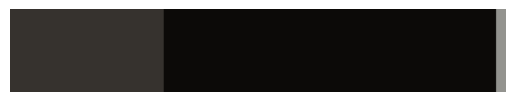

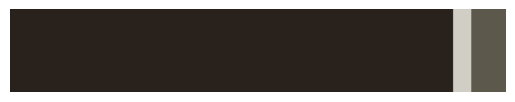

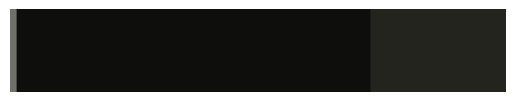

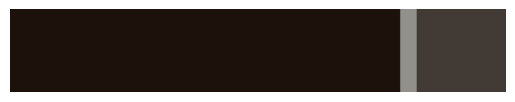

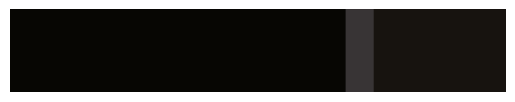

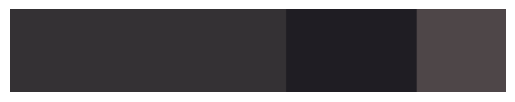

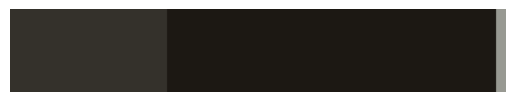

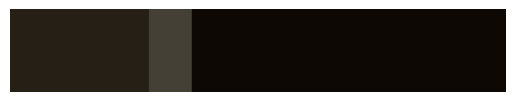

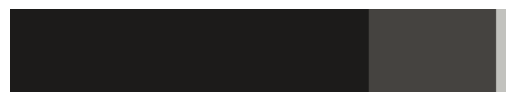

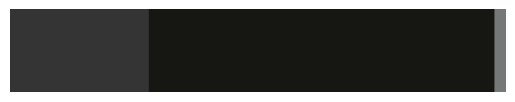

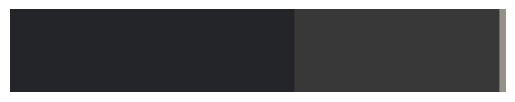

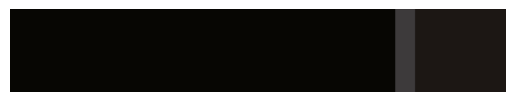

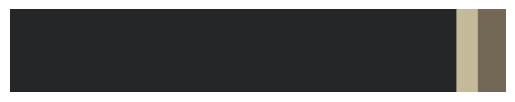

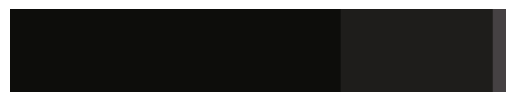

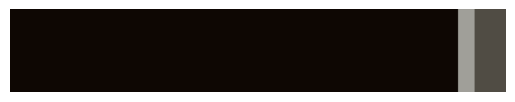

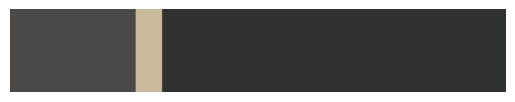

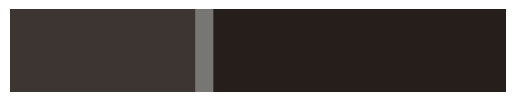

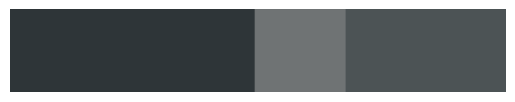

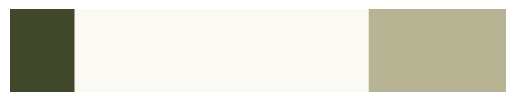

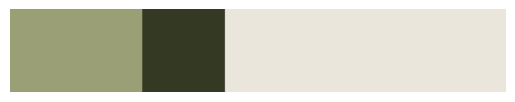

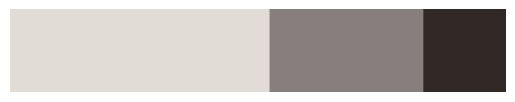

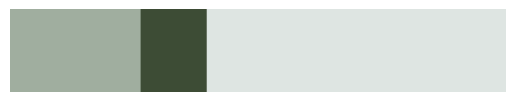

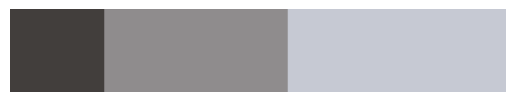

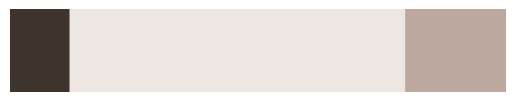

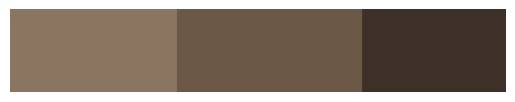

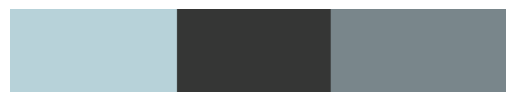

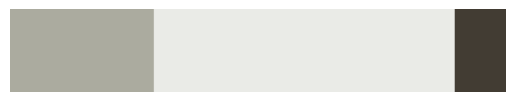

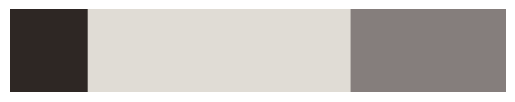

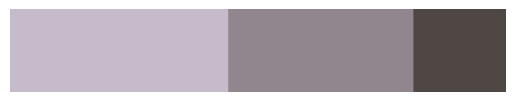

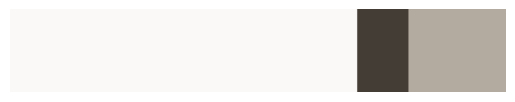

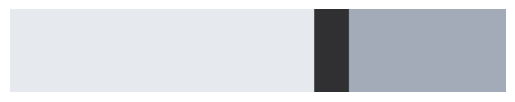

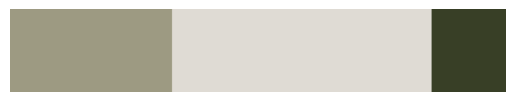

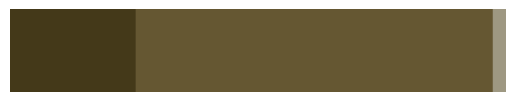

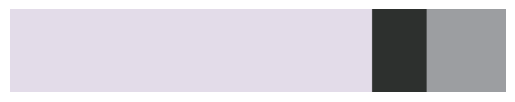

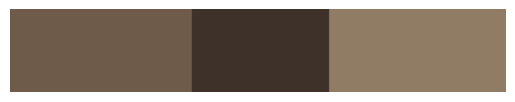

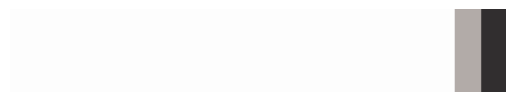

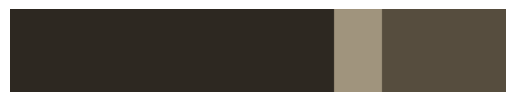

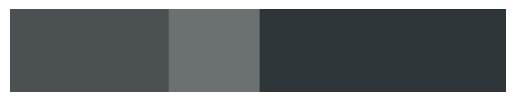

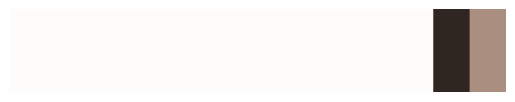

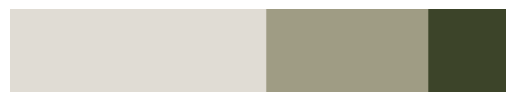

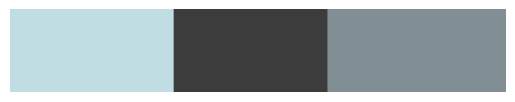

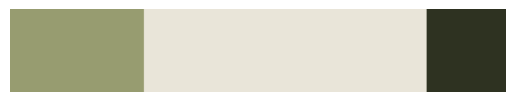

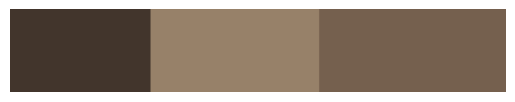

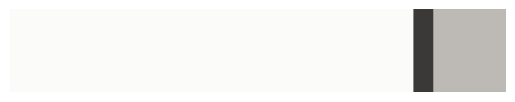

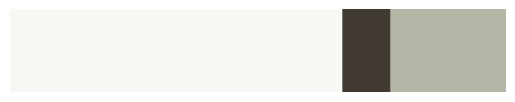

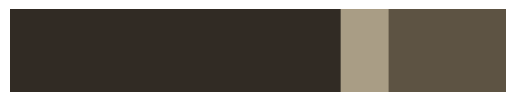

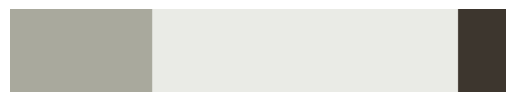

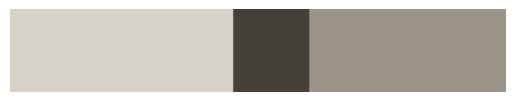

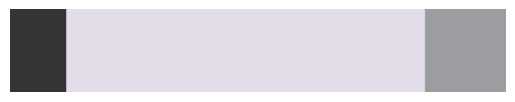

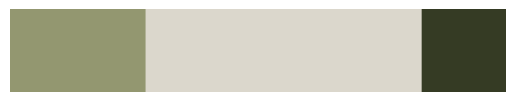

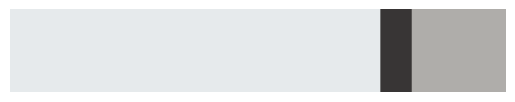

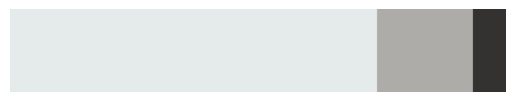

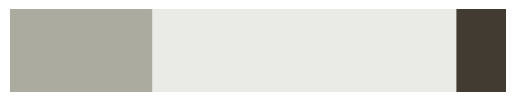

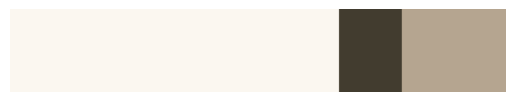

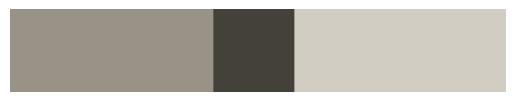

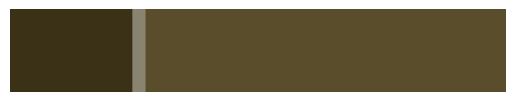

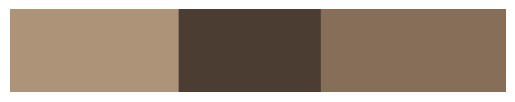

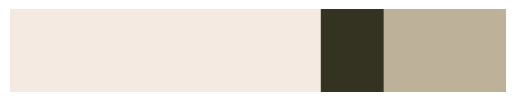

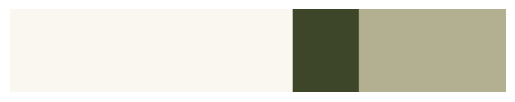

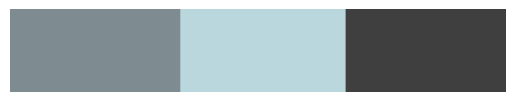

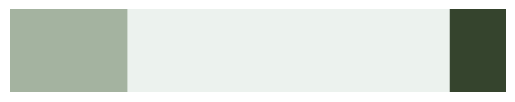

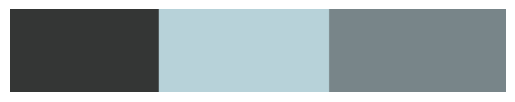

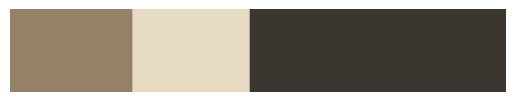

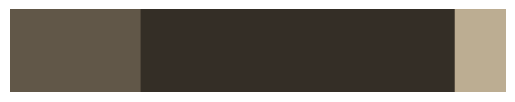

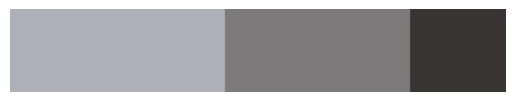

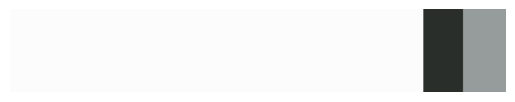

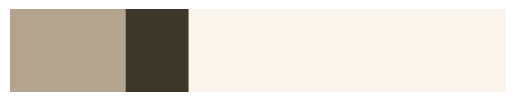

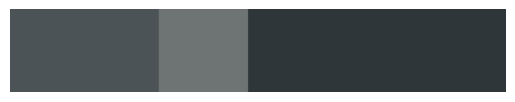

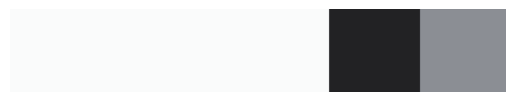

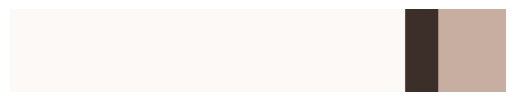

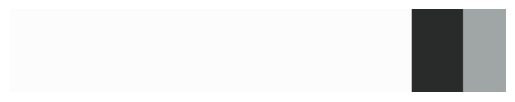

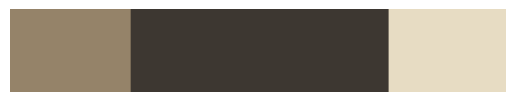

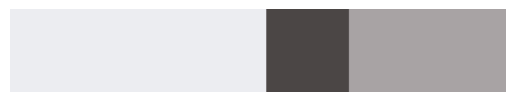

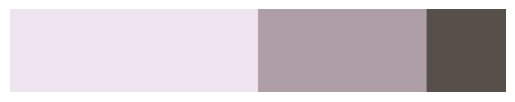

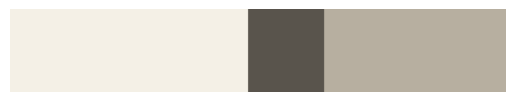

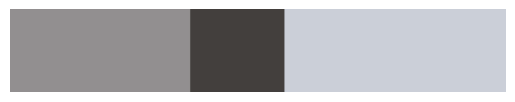

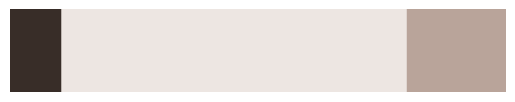

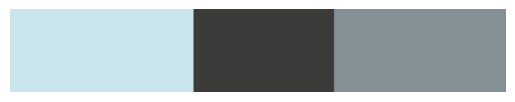

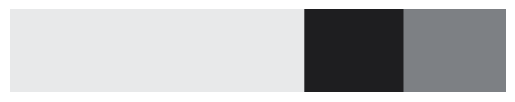

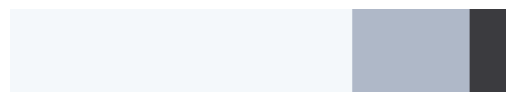

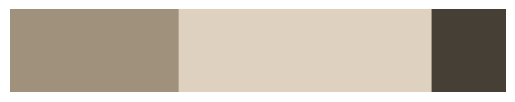

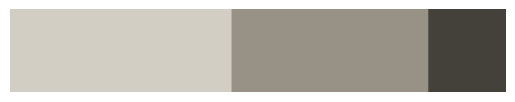

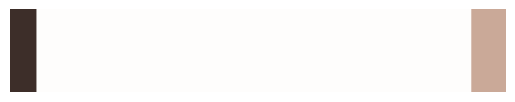

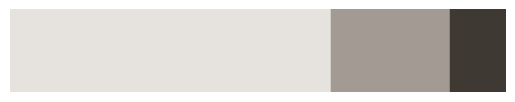

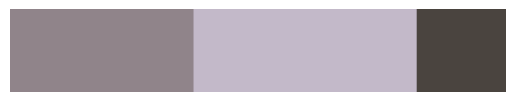

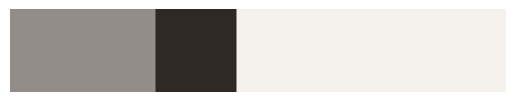

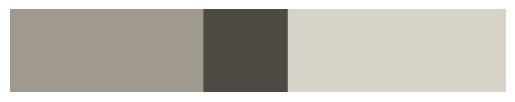

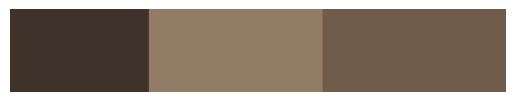

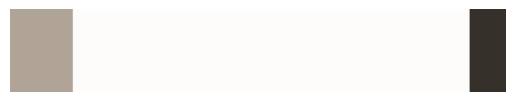

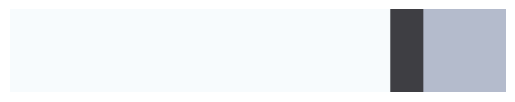

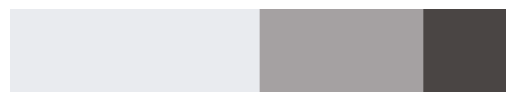

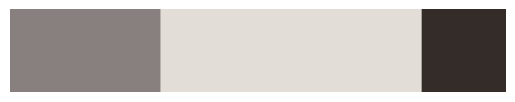

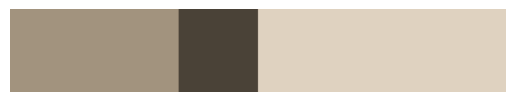

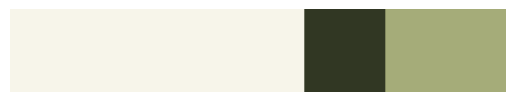

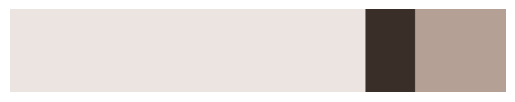

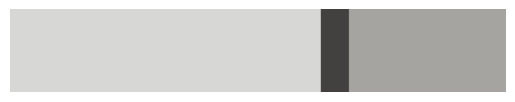

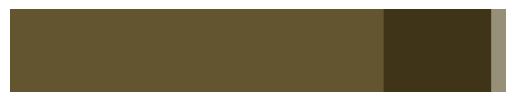

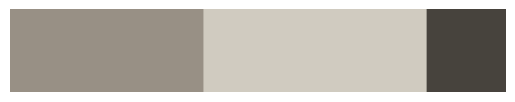

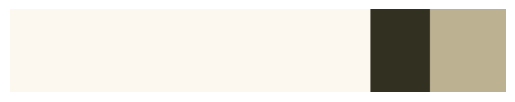

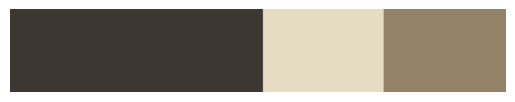

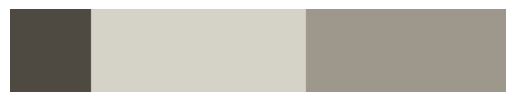

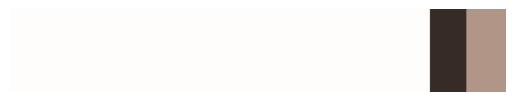

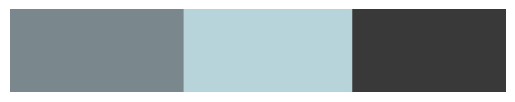

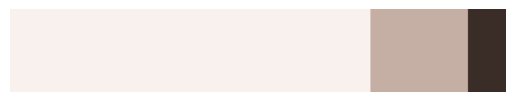

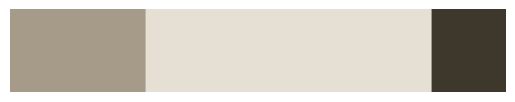

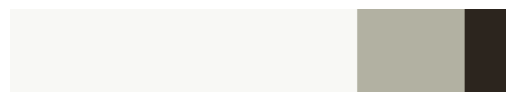

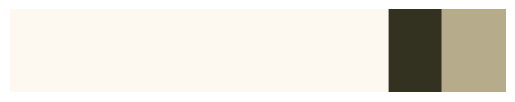

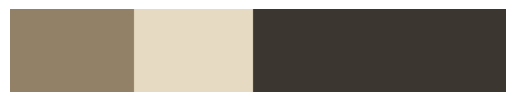

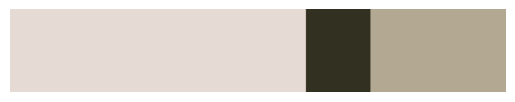

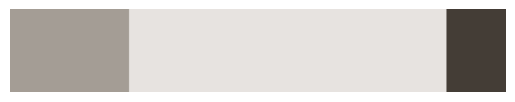

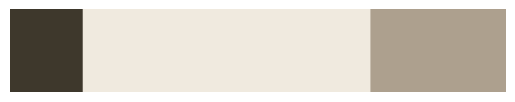

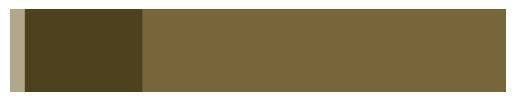

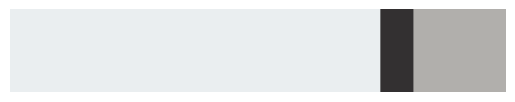

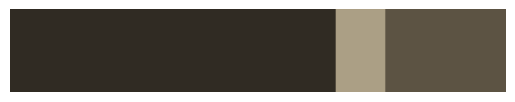

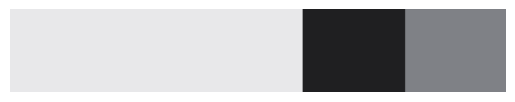

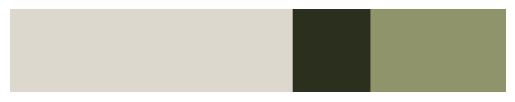

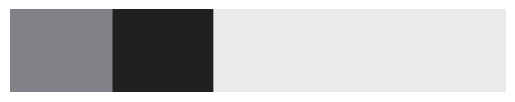

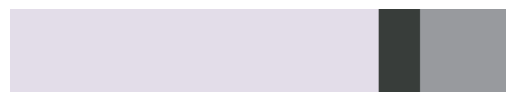

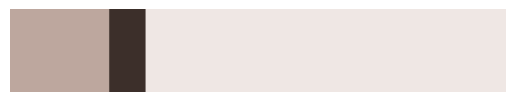

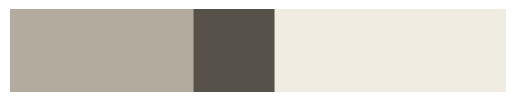

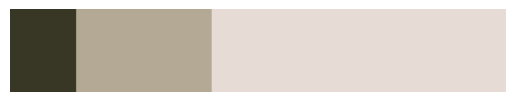

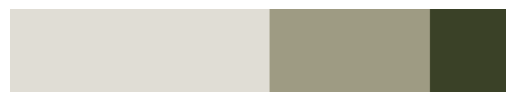

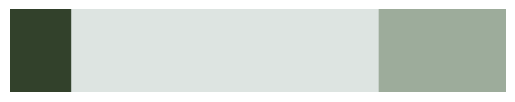

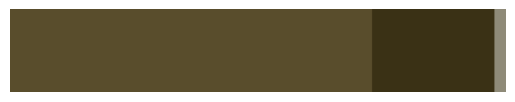

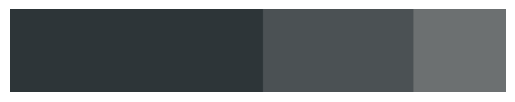

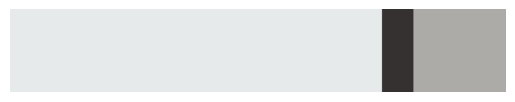

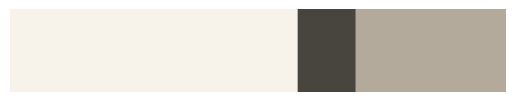

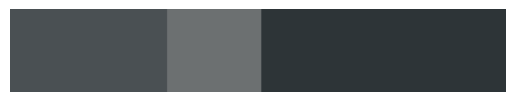

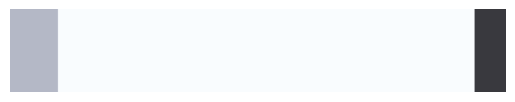

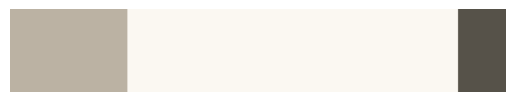

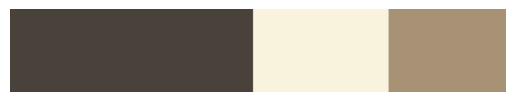

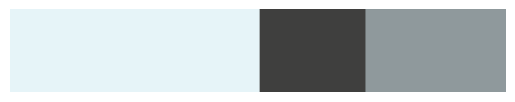

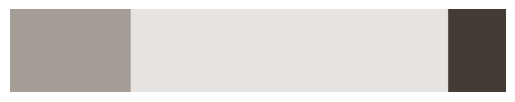

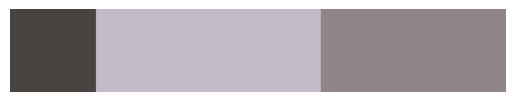

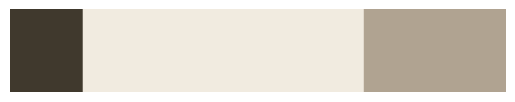

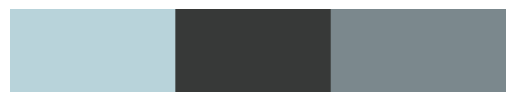

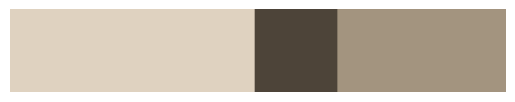

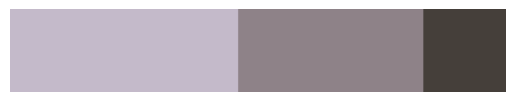

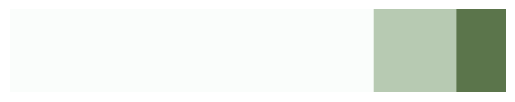

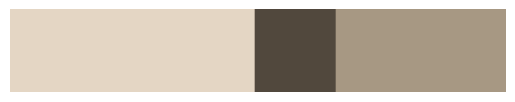

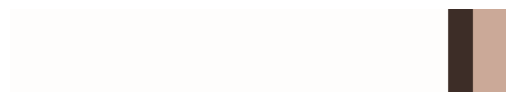

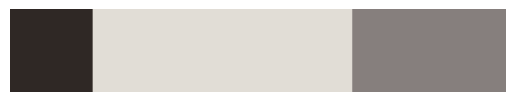

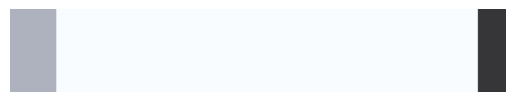

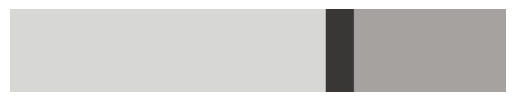

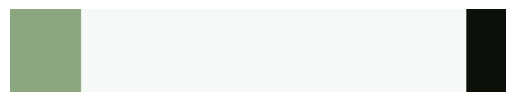

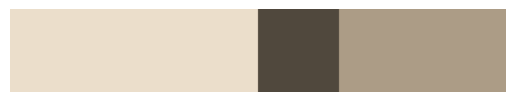

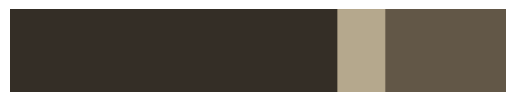

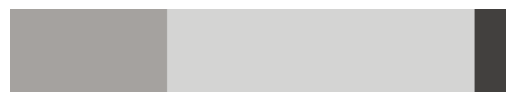

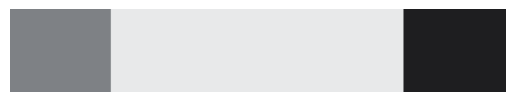

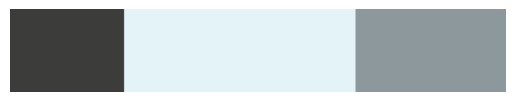

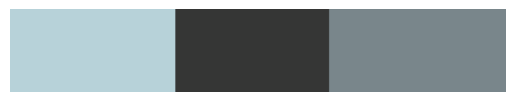

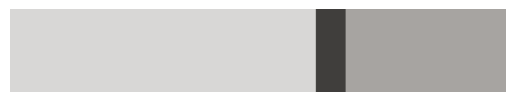

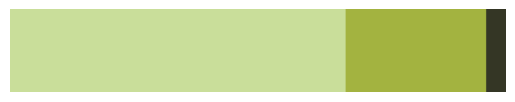

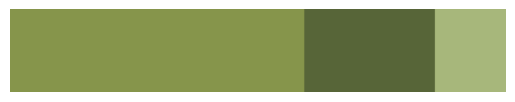

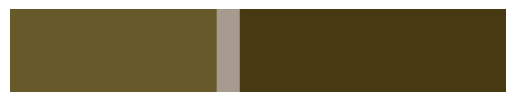

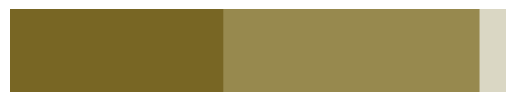

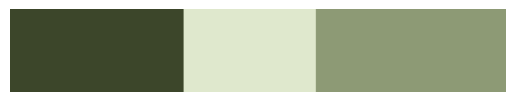

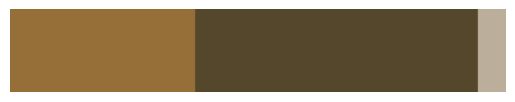

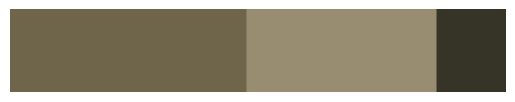

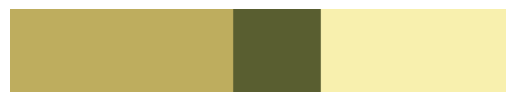

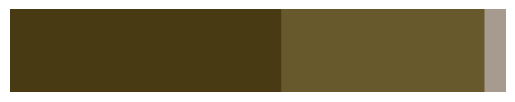

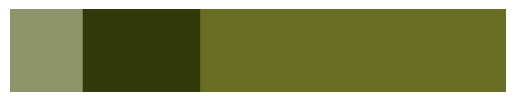

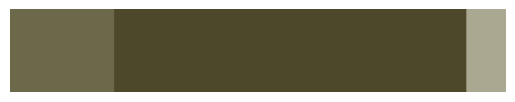

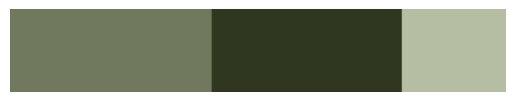

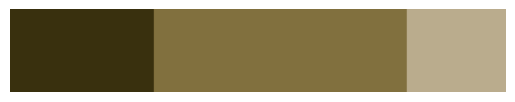

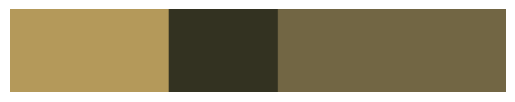

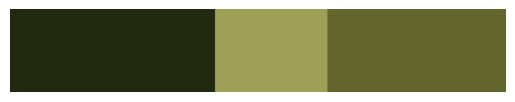

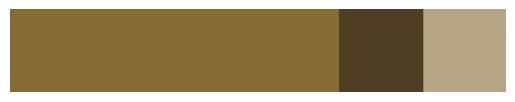

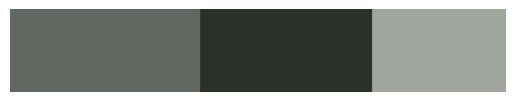

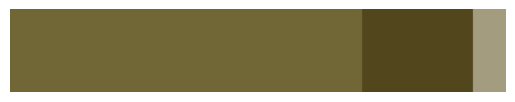

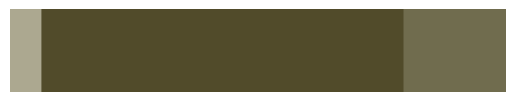

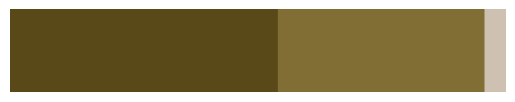

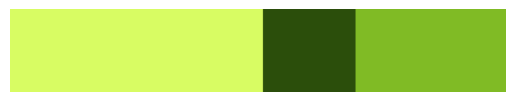

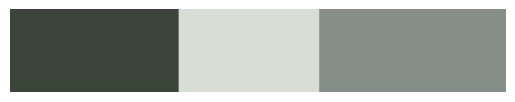

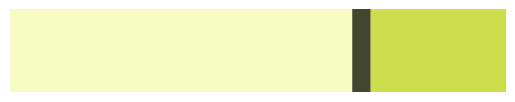

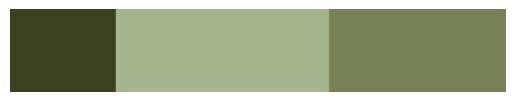

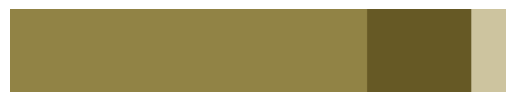

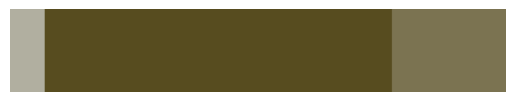

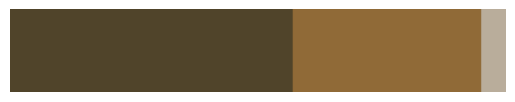

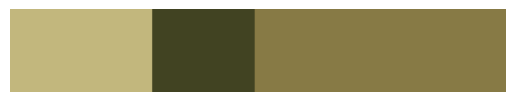

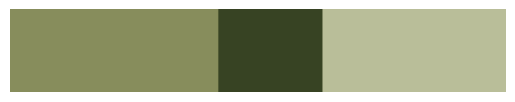

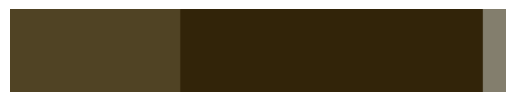

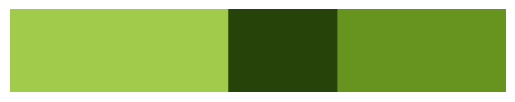

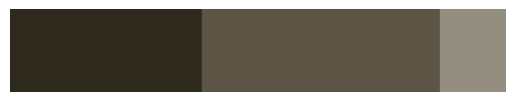

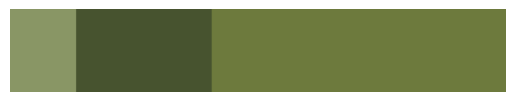

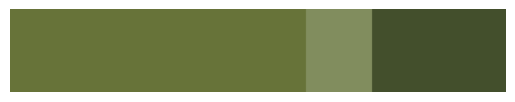

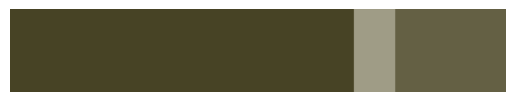

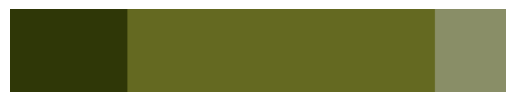

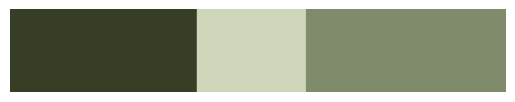

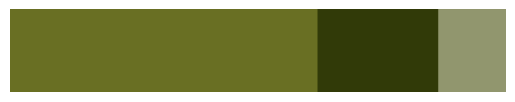

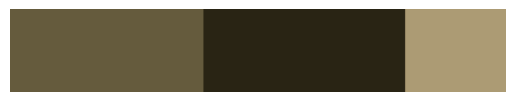

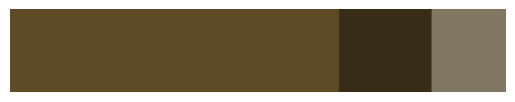

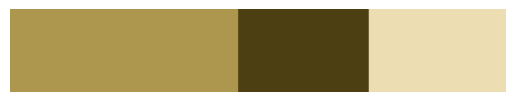

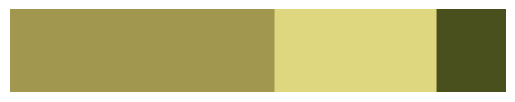

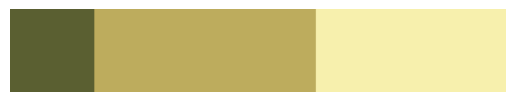

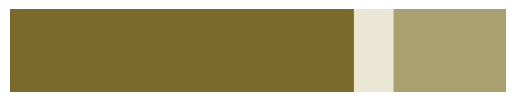

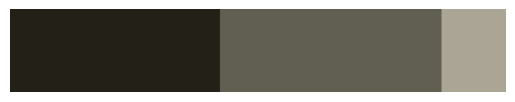

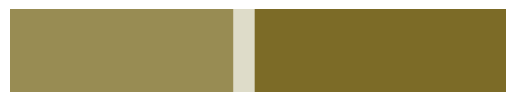

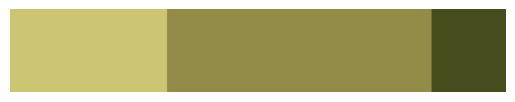

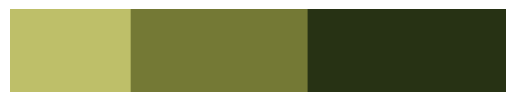

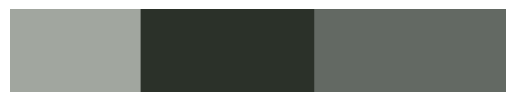

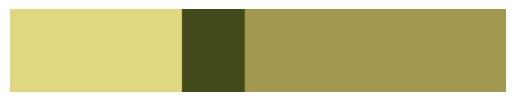

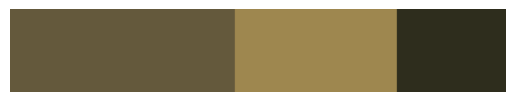

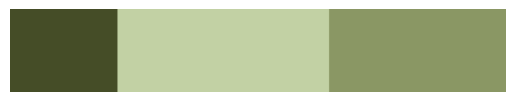

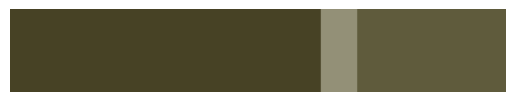

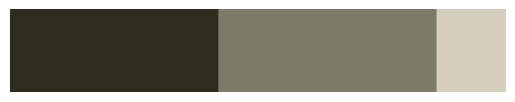

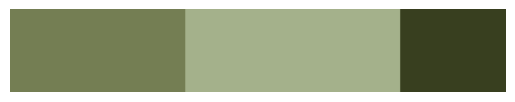

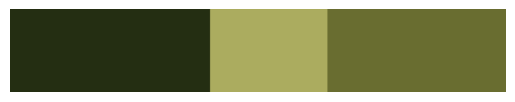

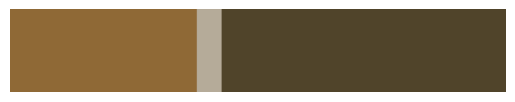

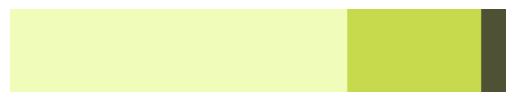

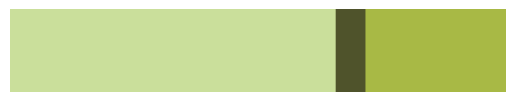

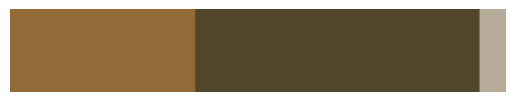

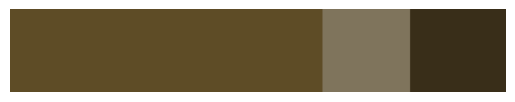

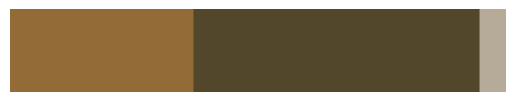

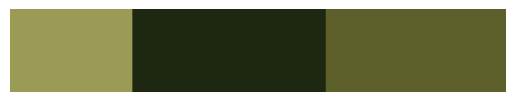

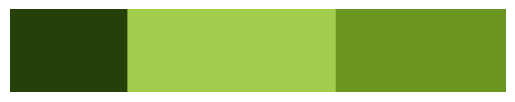

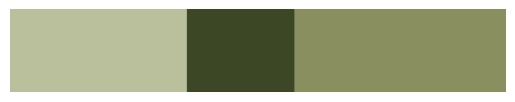

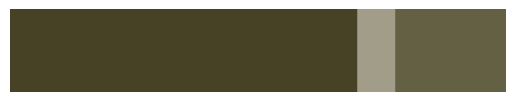

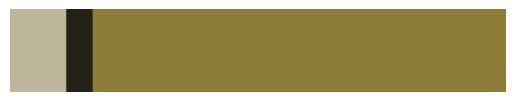

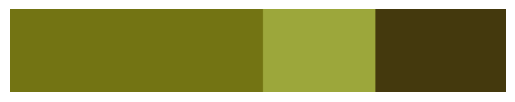

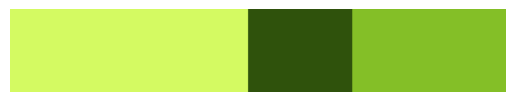

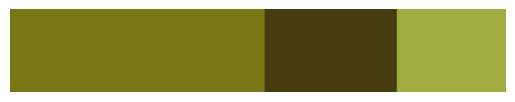

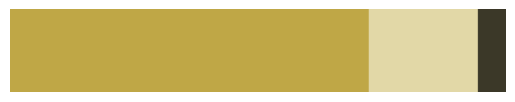

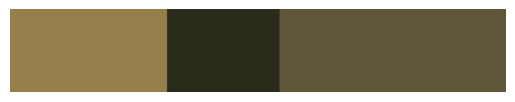

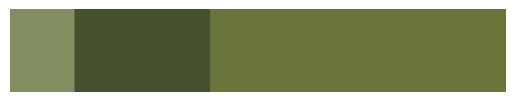

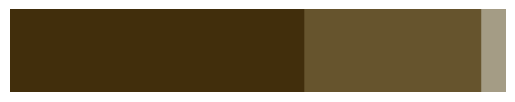

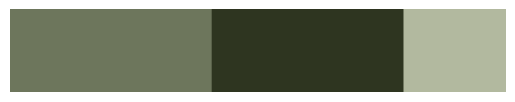

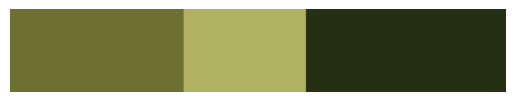

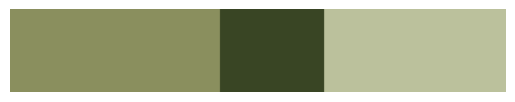

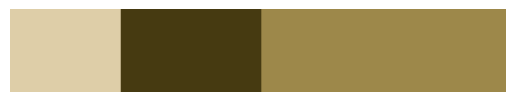

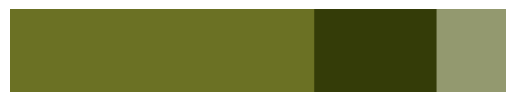

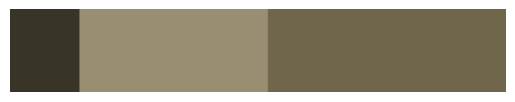

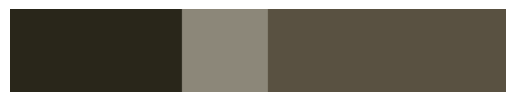

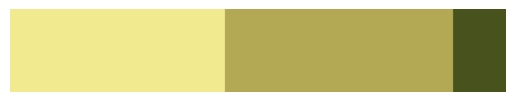

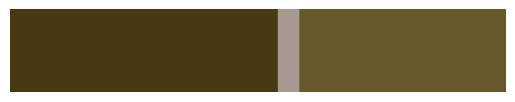

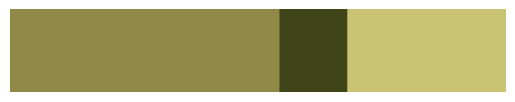

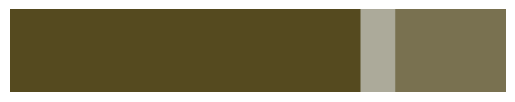

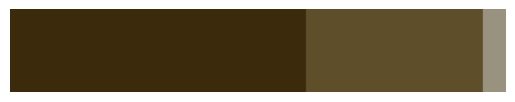

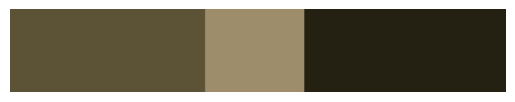

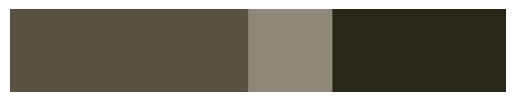

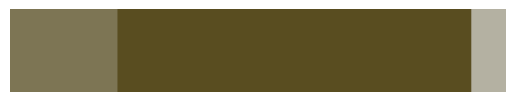

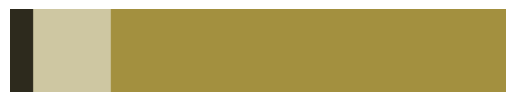

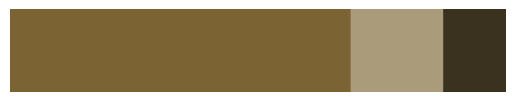

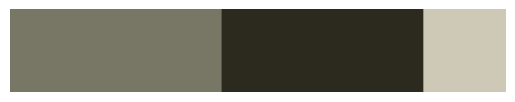

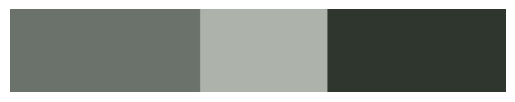

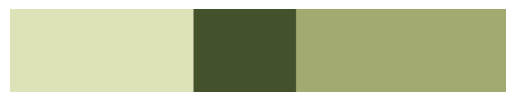

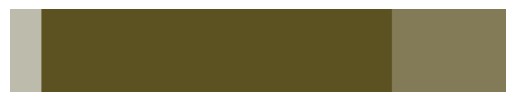

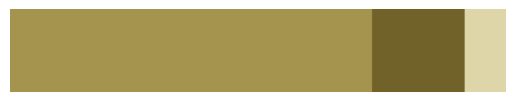

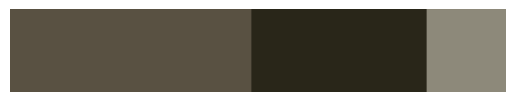

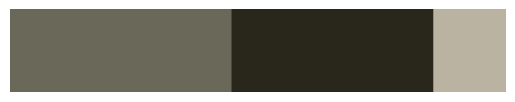

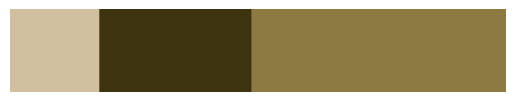

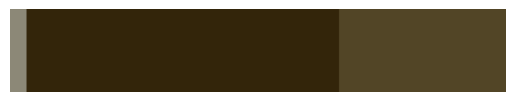

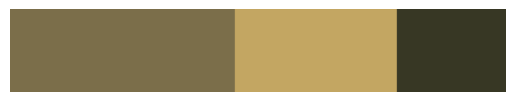

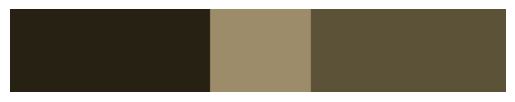

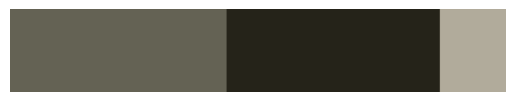

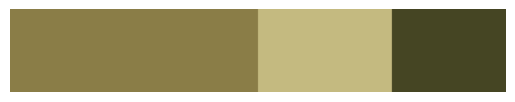

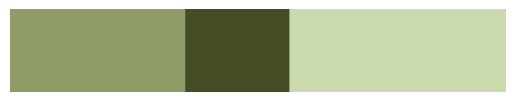

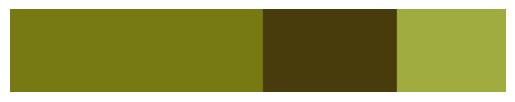

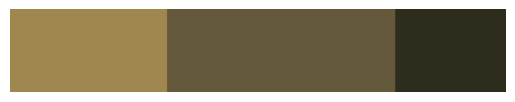

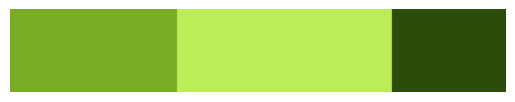

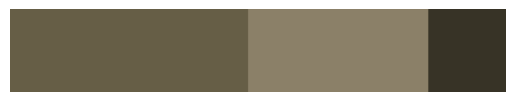

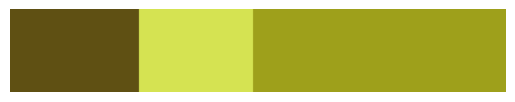

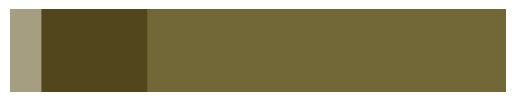

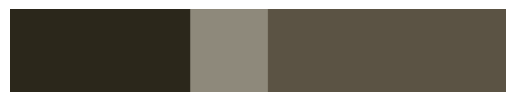

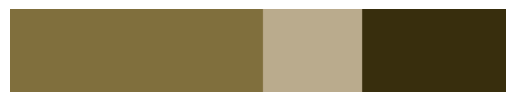

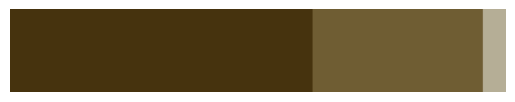

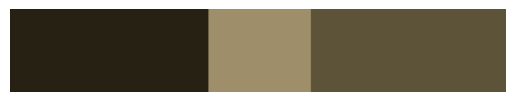

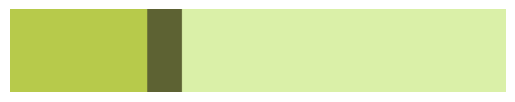

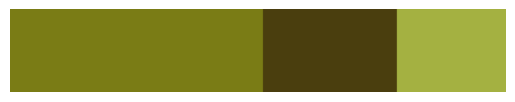

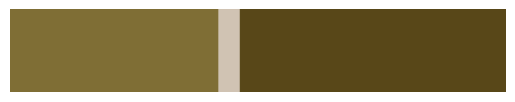

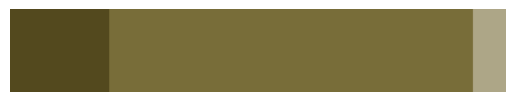

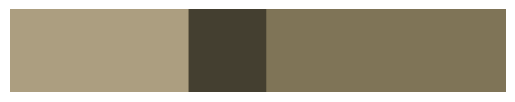

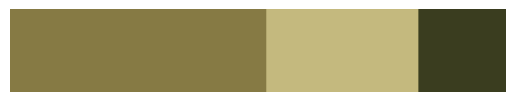

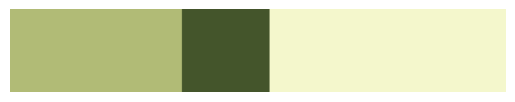

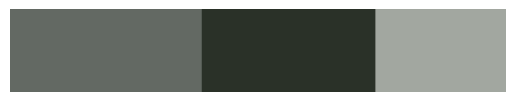

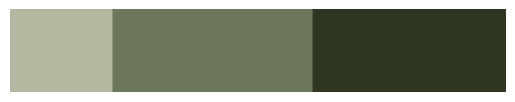

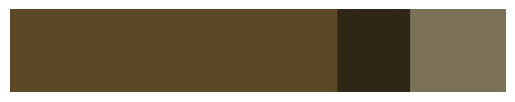

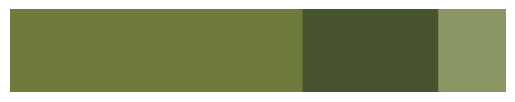

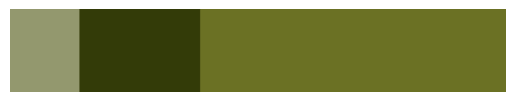

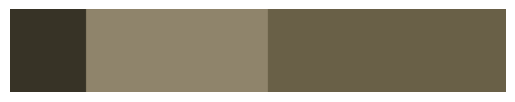

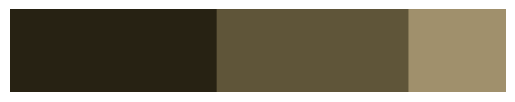

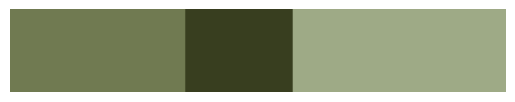

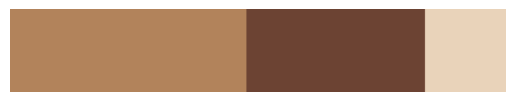

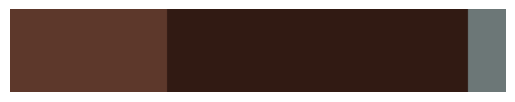

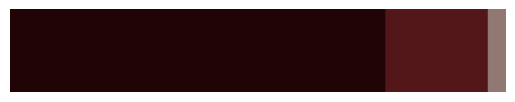

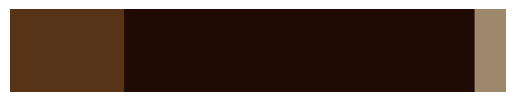

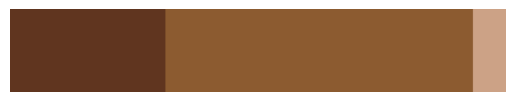

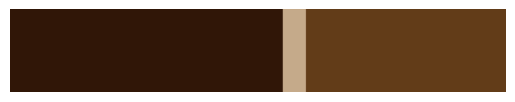

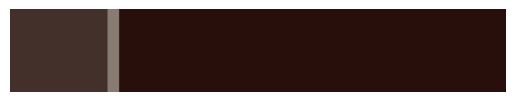

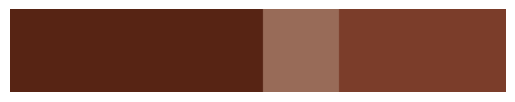

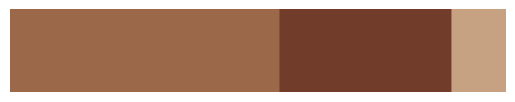

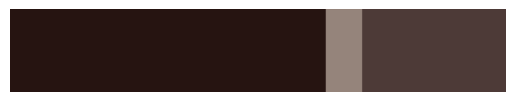

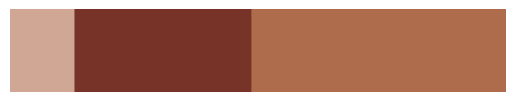

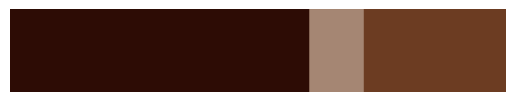

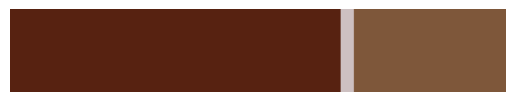

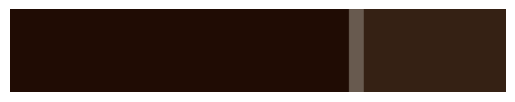

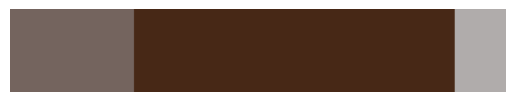

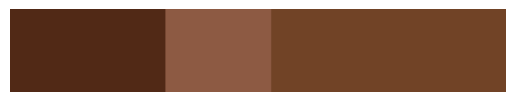

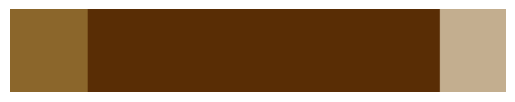

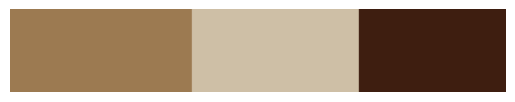

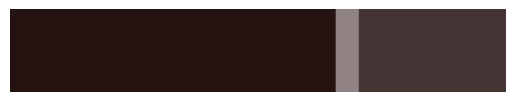

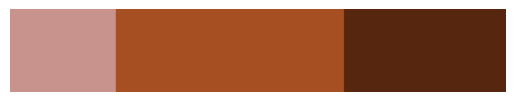

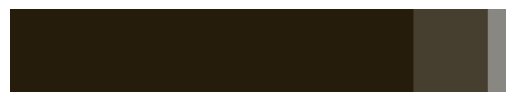

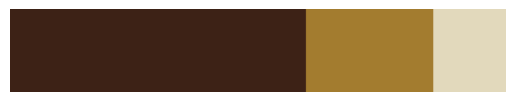

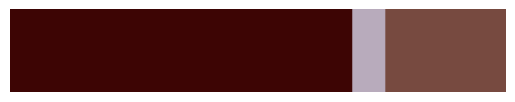

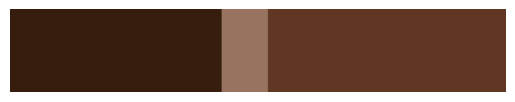

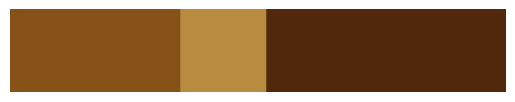

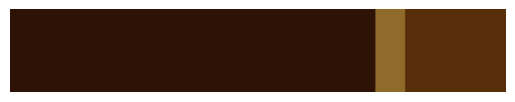

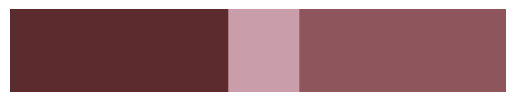

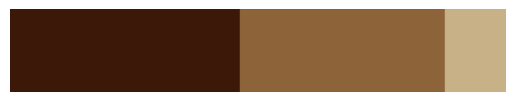

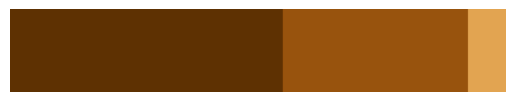

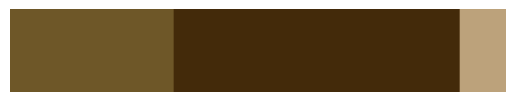

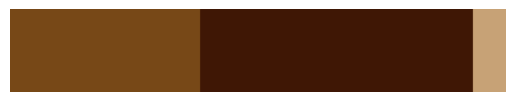

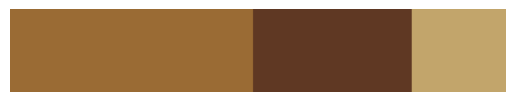

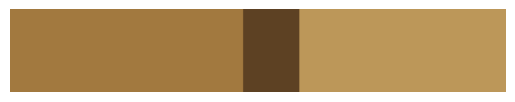

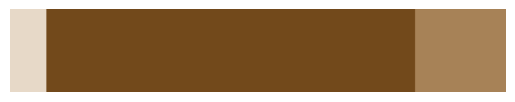

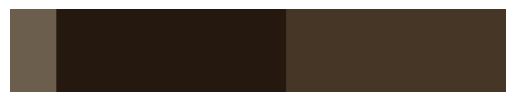

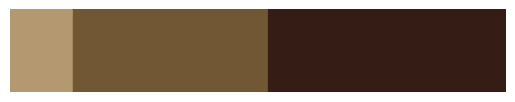

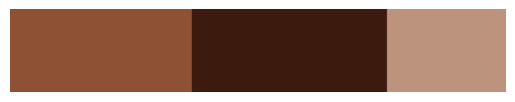

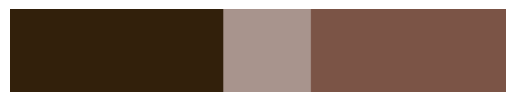

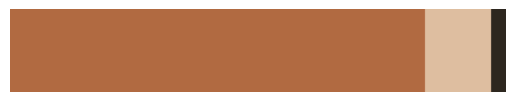

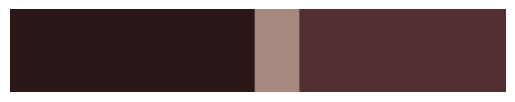

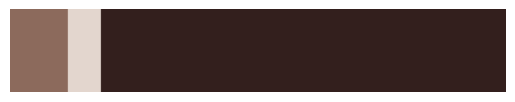

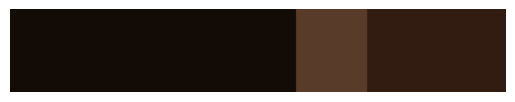

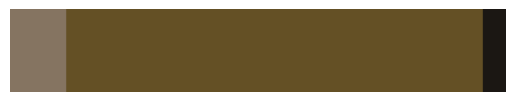

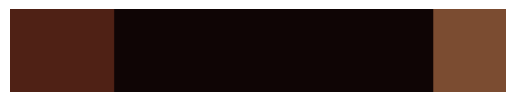

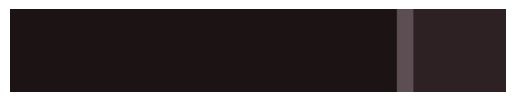

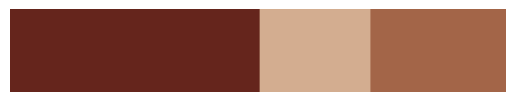

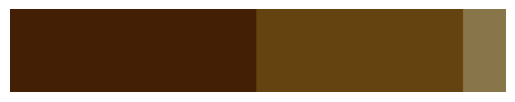

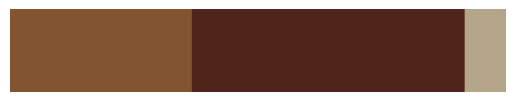

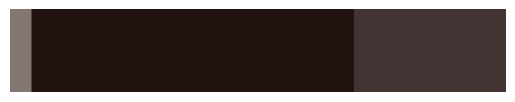

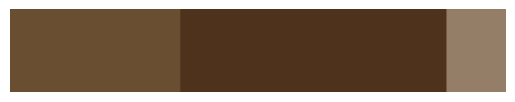

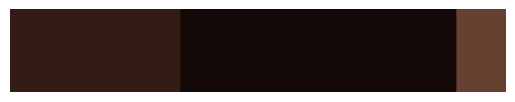

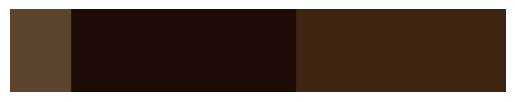

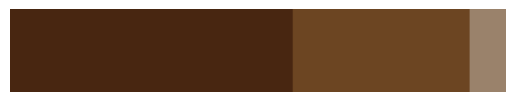

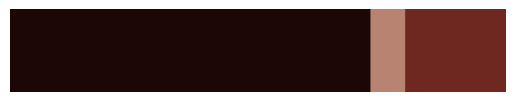

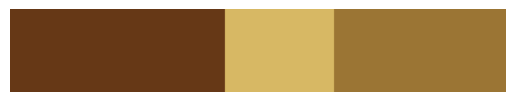

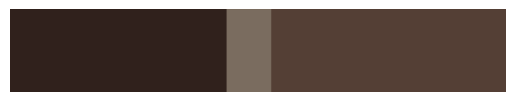

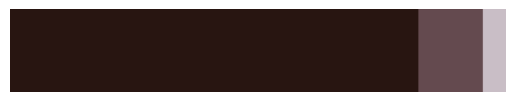

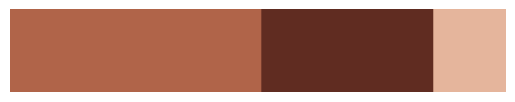

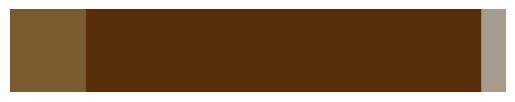

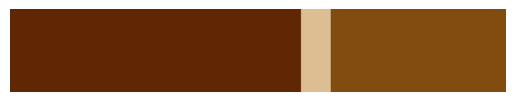

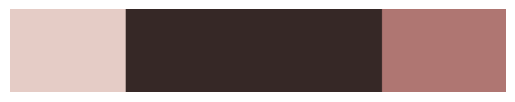

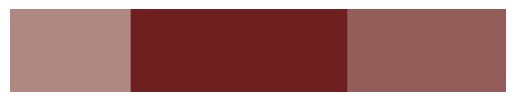

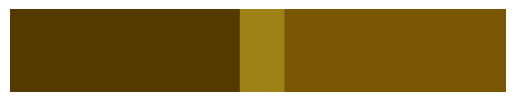

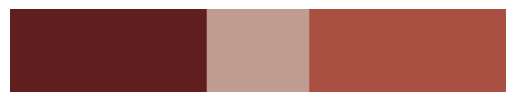

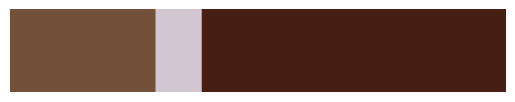

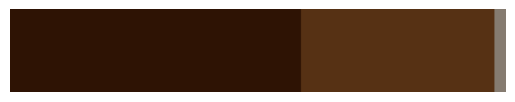

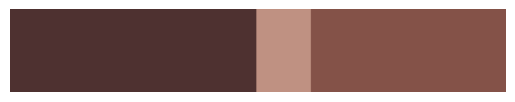

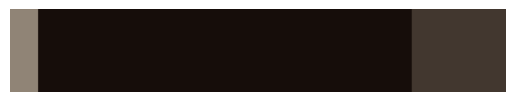

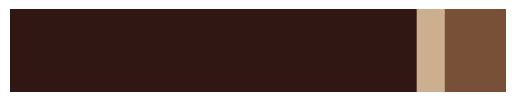

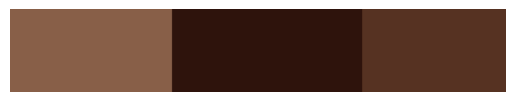

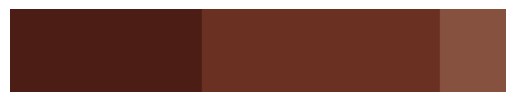

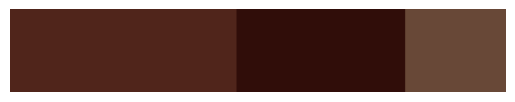

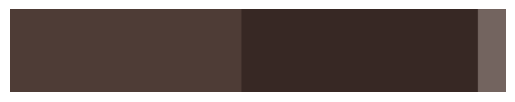

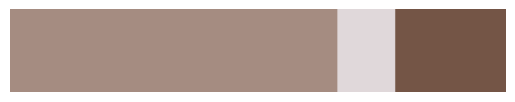

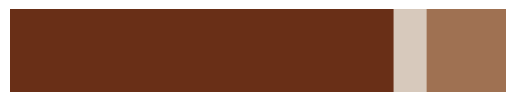

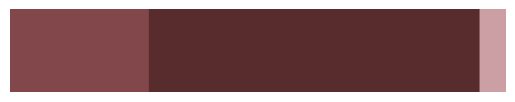

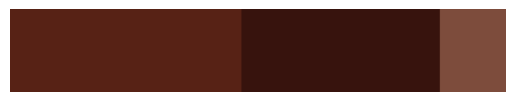

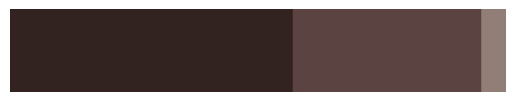

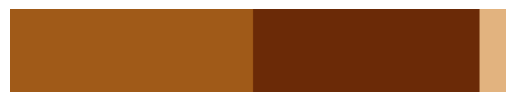

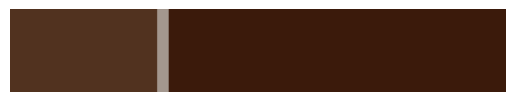

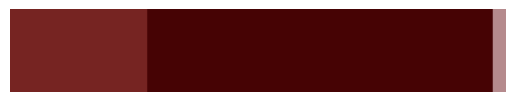

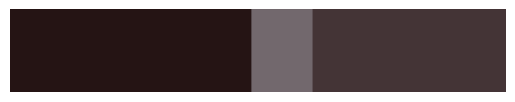

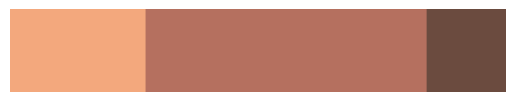

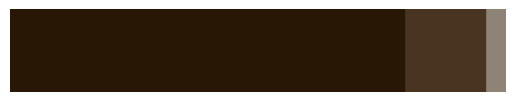

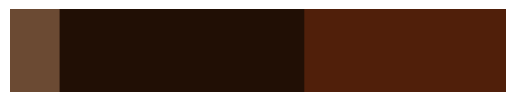

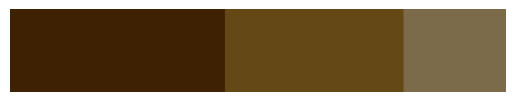

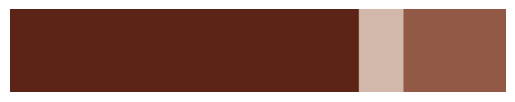

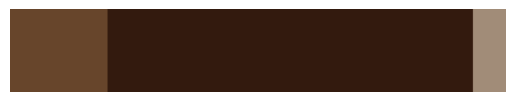

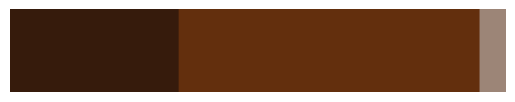

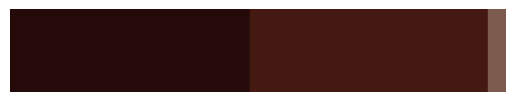

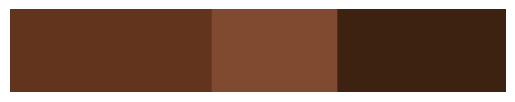

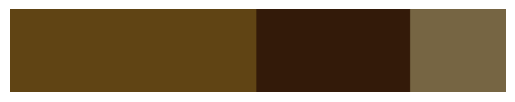

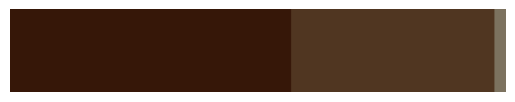

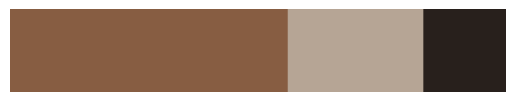

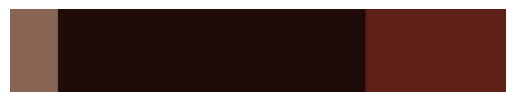

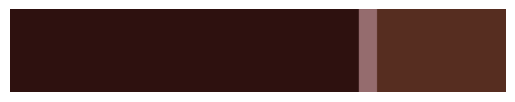

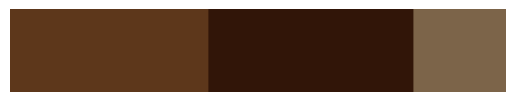

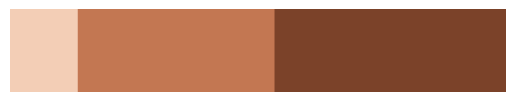

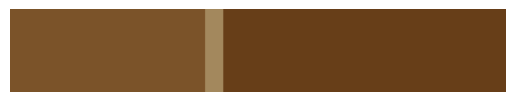

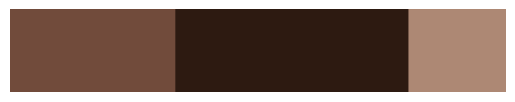

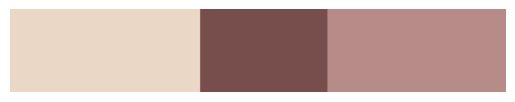

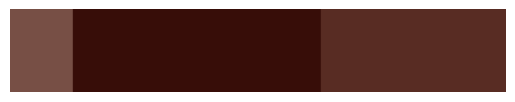

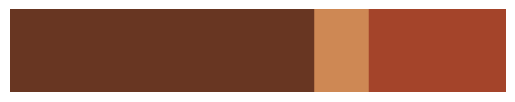

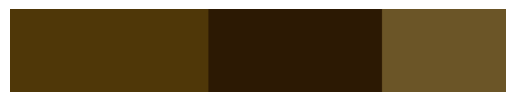

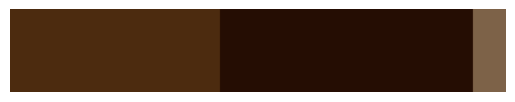

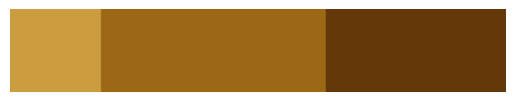

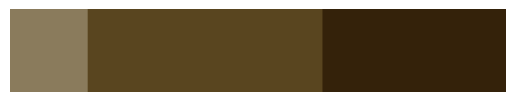

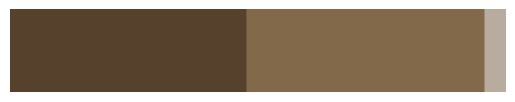

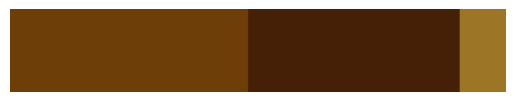

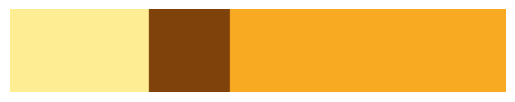

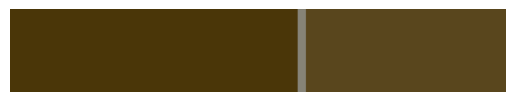

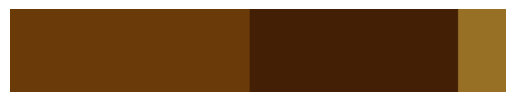

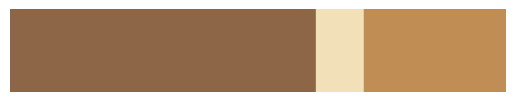

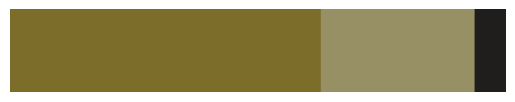

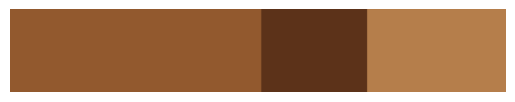

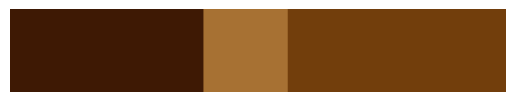

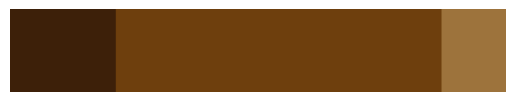

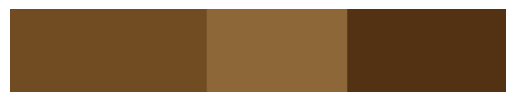

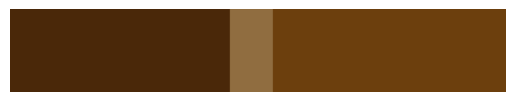

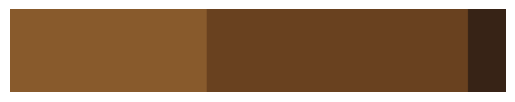

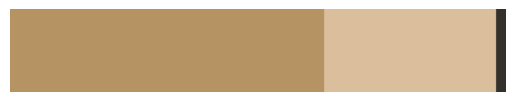

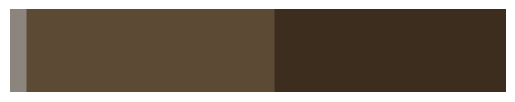

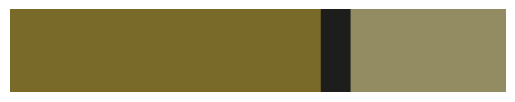

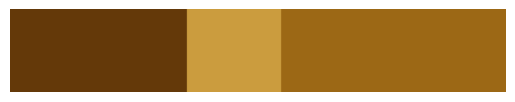

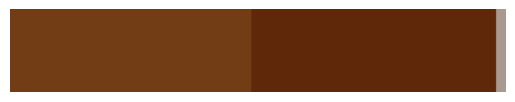

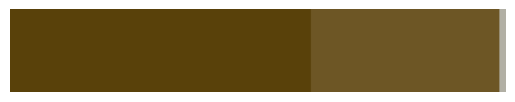

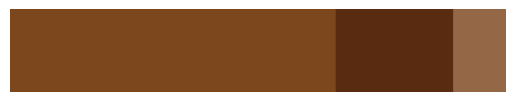

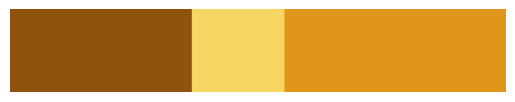

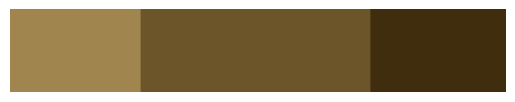

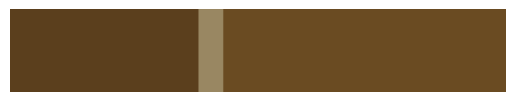

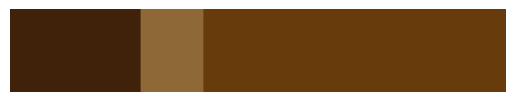

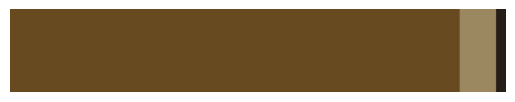

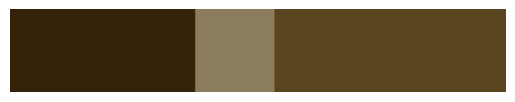

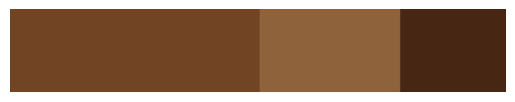

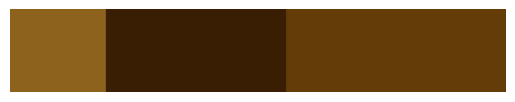

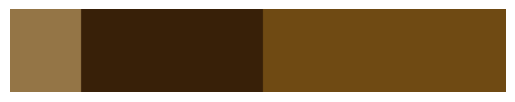

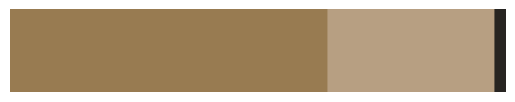

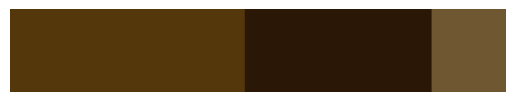

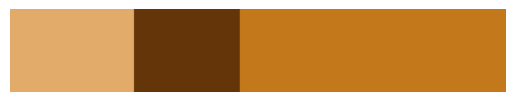

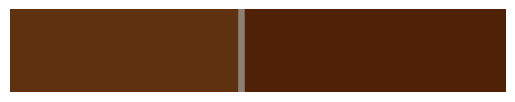

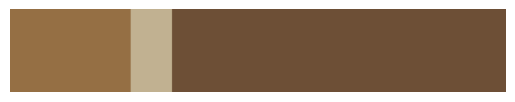

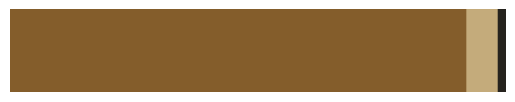

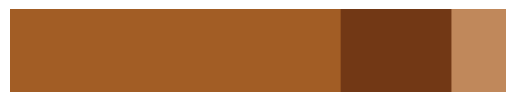

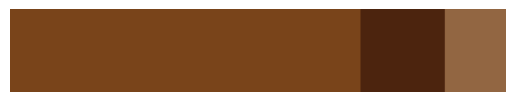

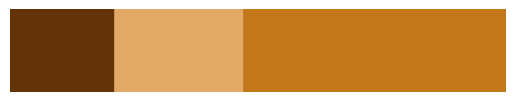

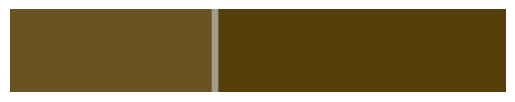

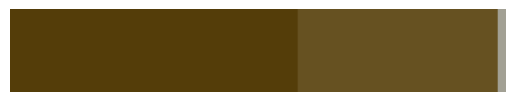

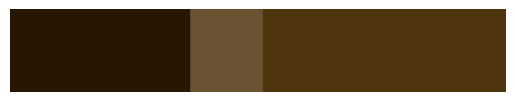

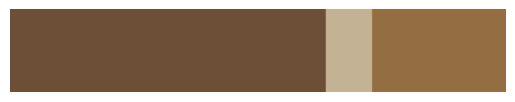

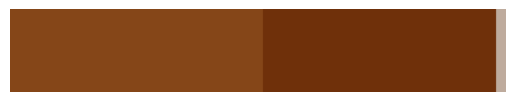

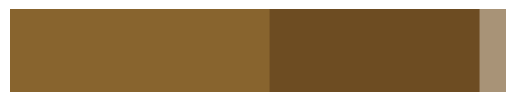

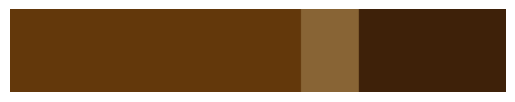

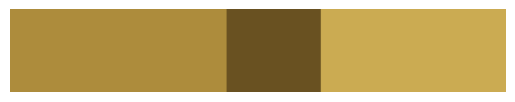

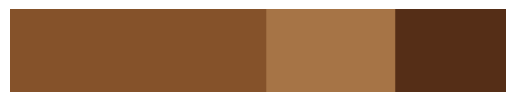

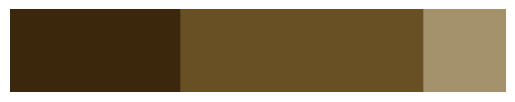

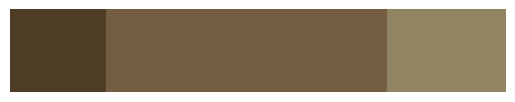

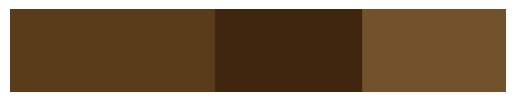

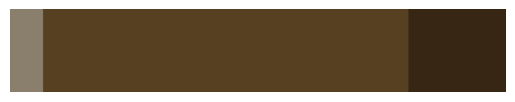

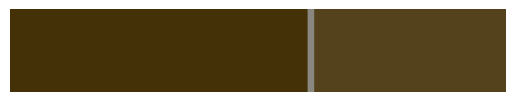

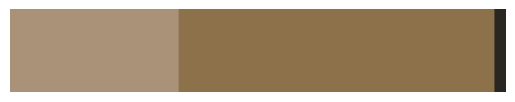

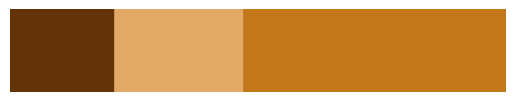

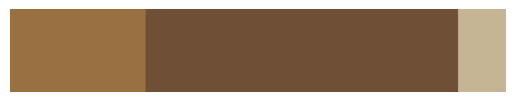

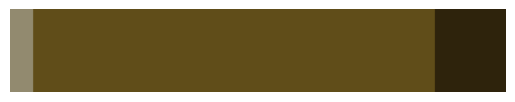

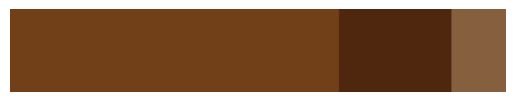

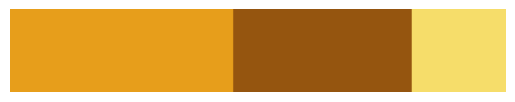

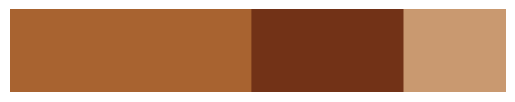

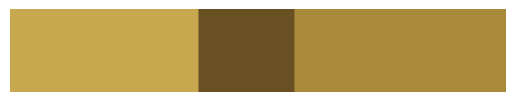

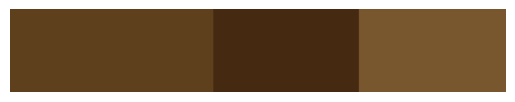

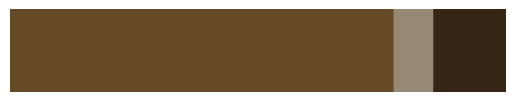

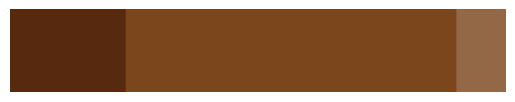

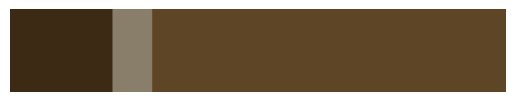

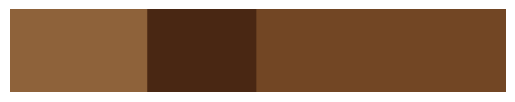

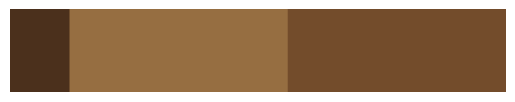

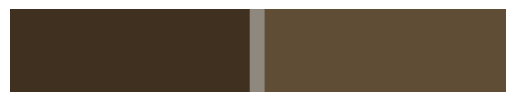

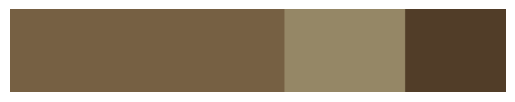

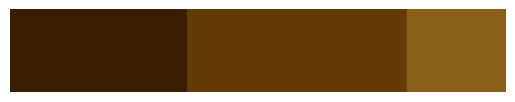

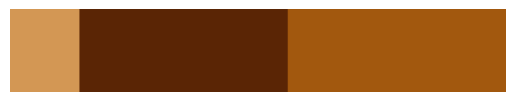

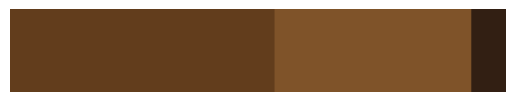

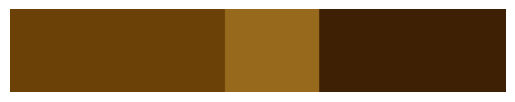

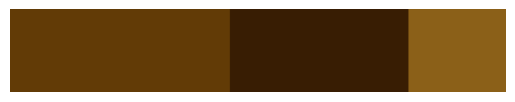

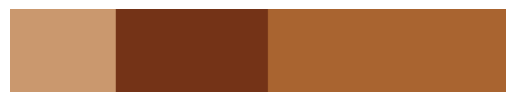

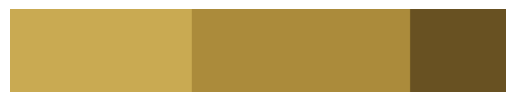

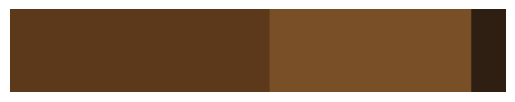

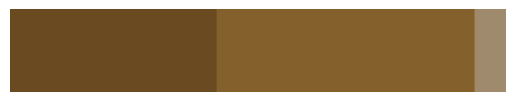

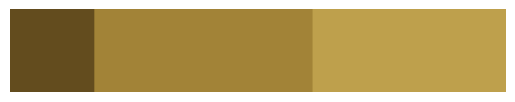

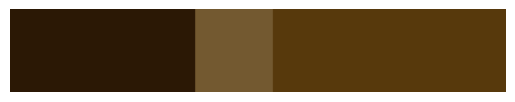

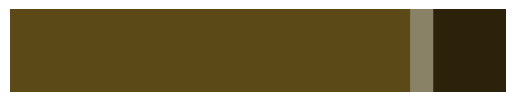

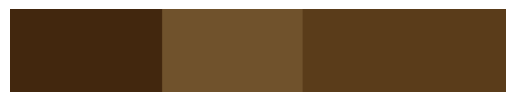

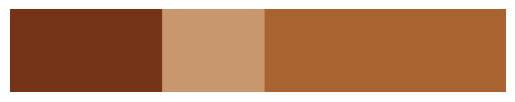

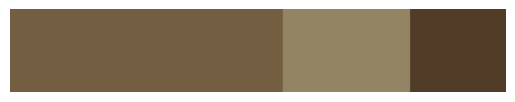

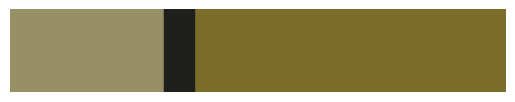

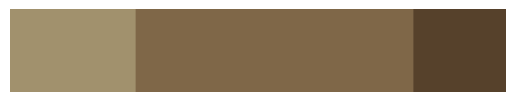

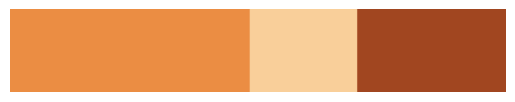

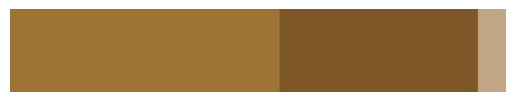

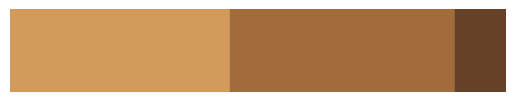

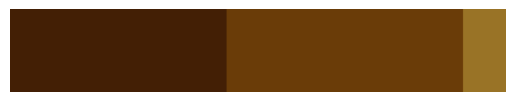

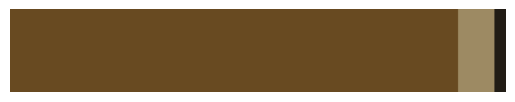

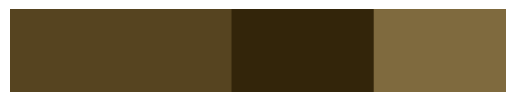

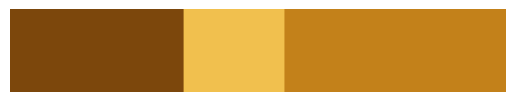

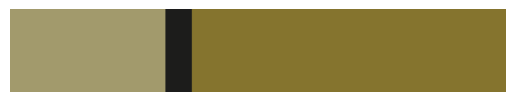

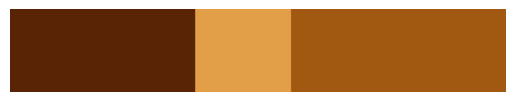

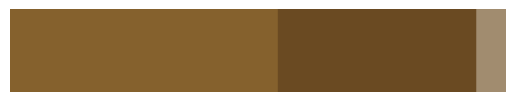

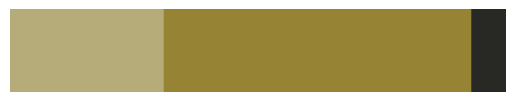

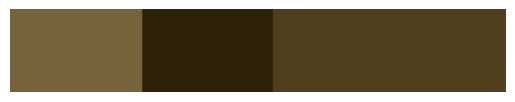

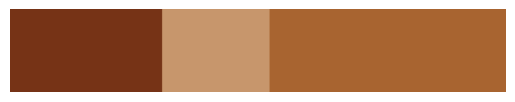

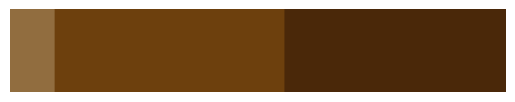

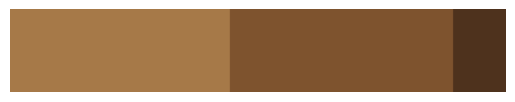

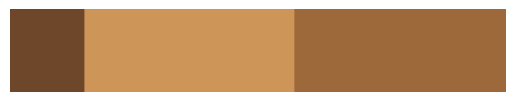

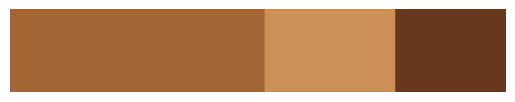

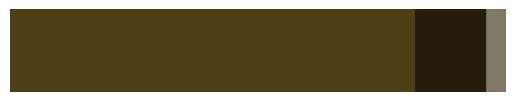

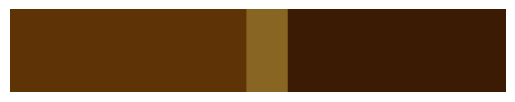

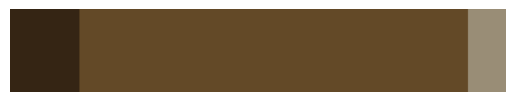

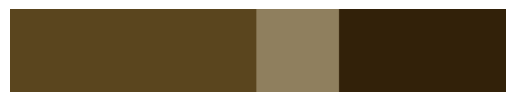

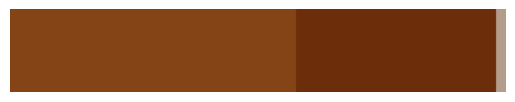

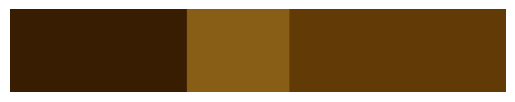

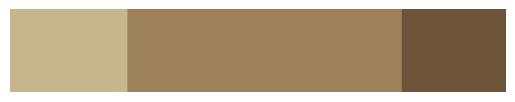

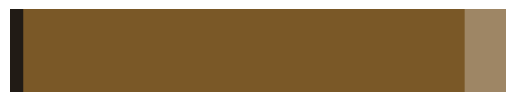

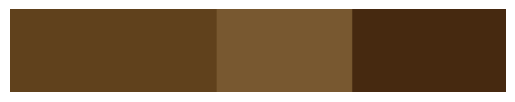

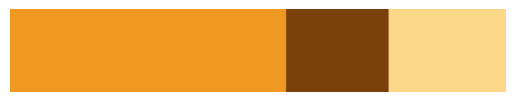

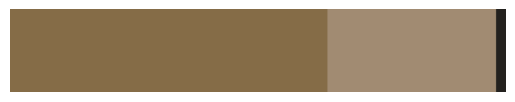

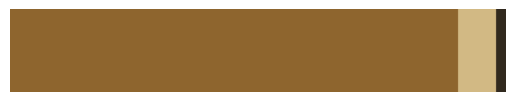

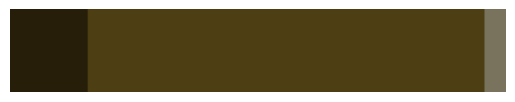

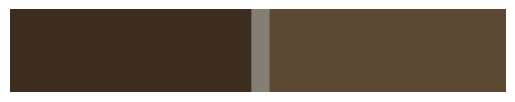

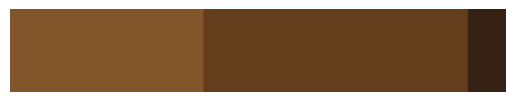

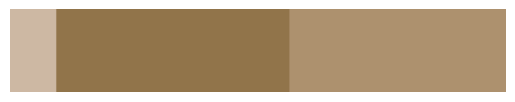

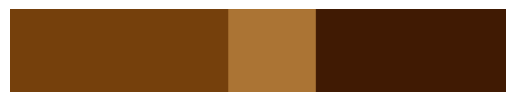

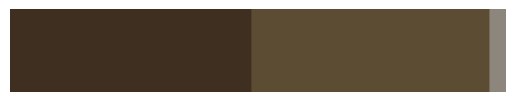

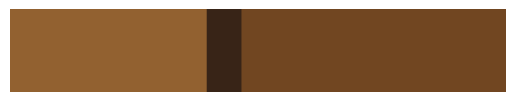

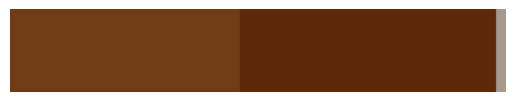

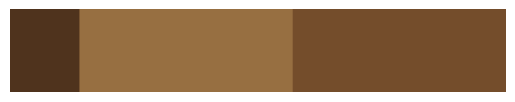

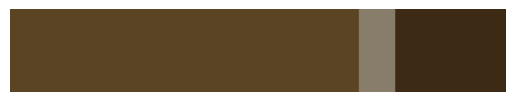

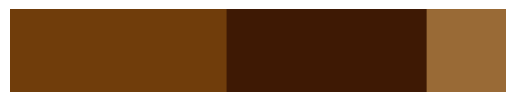

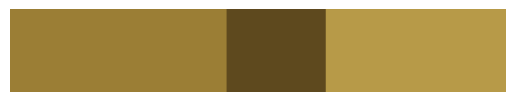

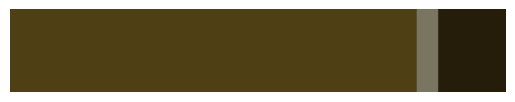

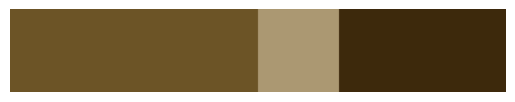

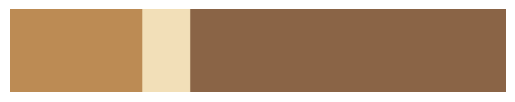

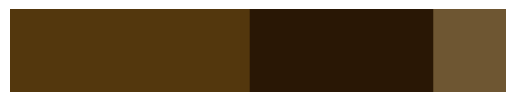

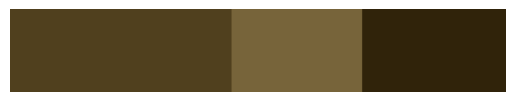

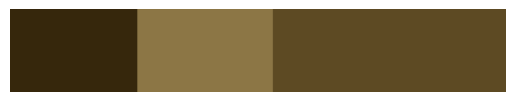

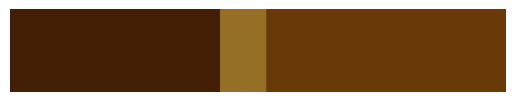

In [5]:
image_path = r"C:\Users\user\imagedata\sample" #이미지 가져올 경로 지정

image_color_cluster(image_path) #이미지 경로에 있는 파일들의 색상표 추출
print("완료") #다 끝나면 완료 출력